# ***Lab 1 : Trực Quan Hoá Dữ Liệu Với Python***


## ***Import thư viện và data***

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from IPython.display import display, HTML
import pycountry
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [53]:
# Load the dataset
df = pd.read_csv('ds_salaries.csv')

## ***1.Thu thập dữ liệu***


### ***1.1.Câu chuyện bối cảnh khiến nhóm chọn chủ đề này ?***

Với vai trò là sinh viên trong ngành khoa học dữ liệu, nhóm chúng em chọn bộ dữ liệu này là muốn phân tích nhầm hiểu rõ về mức lương, nhu cầu về nhân lực của các lĩnh vực khác nhau trong ngành này và các yếu tố ảnh hưởng đến thu nhập trong ngành này và có cái nhìn thực tế về thị trường lao động. Điều này rất cần thiết cho việc định hướng nghề nghiệp và đưa ra các quyết định phù hợp về việc học tập và rèn luyện kỹ năng.

### ***1.2.Chủ đề chính của bộ dữ liệu và nguồn gốc xây dựng bộ dữ liệu?***

Chủ đề chính của bộ dữ liệu này là phân tích mức lương trong các công việc khoa học dữ liệu. Dữ liệu này được lấy từ 
Kaggle : https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/data. Cung cấp thông tin chi tiết về các mảng khác nhau trong ngành khoa học dữ liệu giai đoạn 2020 - 2023. 


### ***1.3.Việc thu thập dữ liệu này như thế nào? Phương pháp thực hiện là gì?***

- Dữ liệu có thể được thu thập từ nguồn https://aijobs.net/ ,một nền tảng tuyển dụng dành riêng cho các vị trí liên quan đến trí tuệ nhân tạo và khoa học dữ liệu.
- Dữ liệu được thu thập thông qua phương pháp quét web (web scraping) có hệ thống, sử dụng Python với Beautiful Soup để phân tích HTML và Selenium để xử lý nội dung động.

### ***1.4.Chúng ta sử dụng tập dữ liệu này như thế nào? Điều này có hợp pháp để sử dụng trong giáo dục?***
- Bộ dữ liệu này có thể được sử dụng cho các mục đích giáo dục và nghiên cứu để :
    - Phân tích mức lương dựa trên các yếu tố như kinh nghiệm, vị trí địa lý, và loại hình công việc.
    - Thực hành các kỹ năng phân tích dữ liệu, trực quan hóa dữ liệu và xây dựng mô hình.
    - Nghiên cứu xu hướng trong thị trường tuyển dụng và lương thưởng trong ngành khoa học dữ liệu.
- Bộ dữ liệu này có hợp pháp trong giáo dục: vì bộ dữ liệu này tuân theo giấy phép Open Database License (ODbL) cho cơ sở dữ liệu và Database Contents License.
    - Open Database License (ODbL): cho phép người dùng tự do sao chép, sửa đổi, và chia sẻ lại dữ liệu, với điều kiện rằng nếu dữ liệu được sửa đổi hoặc sử dụng để tạo ra một sản phẩm mới, sản phẩm đó phải tuân theo cùng giấy phép ODbL
    - Database Contents License: Các nội dung trong cơ sở dữ liệu được bảo vệ và yêu cầu tuân thủ các điều kiện của giấy phép. Điều này giúp bảo vệ quyền lợi của người đóng góp dữ liệu gốc, đồng thời đảm bảo dữ liệu có thể được sử dụng cho các mục đích học tập, nghiên cứu và phân tích mở.

## ***2.Khám phá dữ liệu***

### ***2.1.Giải thích ý nghĩa của từng dòng dữ liệu***

Mỗi dòng dữ liệu là một bảng ghi về mức lương của một nhà khoa học dữ liệu với các thuộc tính liên quan đến: năm làm việc, kinh nghiệm làm việc, loại hình việc làm (fulltime, parttime, ...), chức vụ, lương, đơn vị tiền lương, tiền lương tính theo USD, nơi cư trú, tỷ lệ làm việc (làm online hay offline), vị trí công ty, kích cỡ công ty

Nếu mỗi dòng chứa các loại bản ghi khác nhau, nghĩa là dữ liệu không nhất quán trong cùng một cột hoặc một dòng có thể đại diện cho các loại thông tin khác nhau, thì điều này có thể gây ra một số vấn đề nghiêm trọng trong phân tích dữ liệu:

1. **Khó khăn trong phân tích và diễn giải**: 
   - Dữ liệu không đồng nhất làm cho việc diễn giải kết quả trở nên khó khăn. Ví dụ, nếu cột `job_title` chứa các vai trò khác nhau nhưng không nhất quán (ví dụ: có cả nhà khoa học dữ liệu và kỹ sư phần mềm), thì sẽ không thể đưa ra kết luận chính xác về mức lương của từng vị trí.

2. **Làm giảm tính chính xác và độ tin cậy của kết quả**:
   - Khi dữ liệu không nhất quán, việc tính toán trung bình, trung vị, hoặc các số liệu thống kê khác sẽ bị sai lệch. Ví dụ, nếu dữ liệu về các mức lương của các vai trò khác nhau được trộn lẫn (ví dụ `salary` và `salary_in_usd` bị đảo lộn), mức lương trung bình tính ra có thể không phản ánh chính xác mức lương thực sự của bất kỳ vai trò nào.

3. **Gây lỗi trong các thuật toán hoặc công cụ phân tích**:
   - Các công cụ và thuật toán máy học thường yêu cầu dữ liệu có định dạng thống nhất. Dữ liệu không đồng nhất có thể dẫn đến lỗi hoặc làm giảm hiệu suất của các mô hình. Ví dụ, nếu dữ liệu về mức lương và vai trò bị lẫn lộn, các mô hình dự đoán sẽ khó hoặc không thể nhận diện chính xác xu hướng và mối quan hệ.

4. **Phải tốn nhiều công sức để tiền xử lý dữ liệu**:
   - Trước khi tiến hành phân tích, sẽ cần phải xử lý làm sạch dữ liệu. Quá trình này mất nhiều thời gian và có thể làm chậm tiến độ dự án, đồng thời đòi hỏi phải làm sạch dữ liệu một cách thủ công hoặc phát triển các quy tắc lọc phức tạp.

5. **Gây khó khăn khi trực quan hóa dữ liệu**:
   - Dữ liệu không nhất quán có thể khiến các biểu đồ và bảng số liệu trở nên khó hiểu hoặc sai lệch. Ví dụ, nếu trong biểu đồ lương, dữ liệu về các vai trò khác nhau bị trộn lẫn mà không phân loại, thì người xem sẽ không thể nhận ra các xu hướng hoặc khác biệt cụ thể giữa các nhóm dữ liệu.

Do đó, việc đảm bảo tính nhất quán của dữ liệu theo từng dòng (mỗi dòng phải đại diện cho một bản ghi cùng loại) là rất quan trọng để đảm bảo độ chính xác và hiệu quả của quá trình phân tích.

### ***2.2.Ý nghĩa của từng cột dữ liệu***

Tập dữ liệu có tất cả 11 cột, lần lượt là:

| **Tên cột**            | **Mô tả**        |
|------------------------|-------------------------------------------------------------------------------------------------------|
| `work_year`            | Năm lương được trả (tức năm làm việc)  |
| `experience_level`     | Kinh nghiệm làm việc trong năm đó. (ví dụ: Senior, Entry-level, ...) |
| `employment_type`      | Loại hình làm việc (Fulltime, Parttime, ...)       |
| `job_title`            | Chức vụ/ Chức danh công việc (Ví dụ: Data Analyst, Data Engineer, ...)          |
| `salary`               | Tổng số tiền lương gộp được trả.                      |
| `salary_currency`      | Đơn vị tiền tệ của tiền lương được trả dưới dạng mã tiền tệ ISO 4217.      |
| `salary_in_usd`          | Tiền lương theo đơn vị đô la Mỹ                           |
| `employee_residence`   | Quốc gia cư trú của nhân viên trong năm làm việc theo mã quốc gia ISO 3166.            |
| `remote_ratio`         | Tổng khối lượng công việc được thực hiện từ xa (ví dụ: 100% là hoàn toàn làm online)        |
| `company_location`     | Quốc gia đặt văn phòng chính hoặc chi nhánh hợp đồng của người sử dụng lao động.        
| `company_size`         | Số người trung bình đã làm việc cho công ty trong năm.             |


### ***2.3.Xác định loại dữ liệu của từng cột và kiểm tra xem loại dữ liệu có phù hợp để xử lý tiếp theo hay không.***

In [54]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


May mắn thay, các cột đều được lưu đúng kiểu dữ liệu cần thiết
- Kiểm tra tập dữ liệu ta thấy các cột chứa mức lương ở dạng số nguyên (như là: `salary`, `salary_in_usd`) nên có thể dùng kiểu int64 để lưu trữ
- Cột `work_year` và `remote_ratio` (tỷ lệ phầm trăm) được lưu dưới dạng int64 là hoàn toàn phù hợp
- Các cột còn lại chứa dữ liệu kiểu phân loại như `experience_level`, `employment_type`, `job_title`, `salary_currency`, `employee_residence`, `company_location`, `company_size` đều được lưu dưới dạng object

### ***2.4.Tìm hiểu về phân phối dữ liệu trong các cột***

In [56]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [57]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_year,3755.0,NaN,NaN,NaN,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
experience_level,3755,4,SE,2516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,3755,4,FT,3718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,3755,93,Data Engineer,1040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,3755.0,NaN,NaN,NaN,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_currency,3755,20,USD,3224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,3755.0,NaN,NaN,NaN,137570.38988,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
employee_residence,3755,78,US,3004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,3755.0,NaN,NaN,NaN,46.271638,48.58905,0.0,0.0,0.0,100.0,100.0
company_location,3755,72,US,3040,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### ***Cột `work_year`***

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64


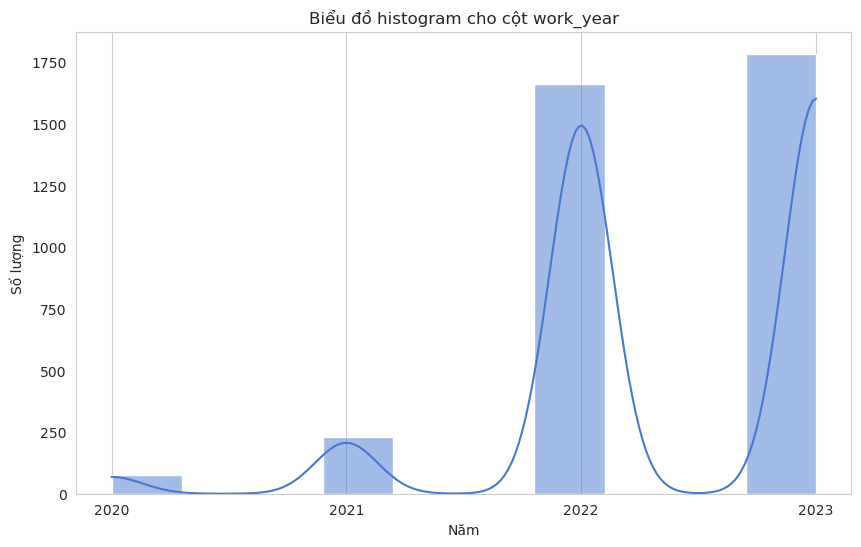

In [58]:
year_counts = df['work_year'].value_counts()
print(year_counts)

# Vẽ histogram cho cột work_year
plt.figure(figsize=(10, 6))
sns.histplot(df['work_year'], bins=10, kde=True)  # kde=True để vẽ đường phân phối
plt.title('Biểu đồ histogram cho cột work_year')
plt.xlabel('Năm')
plt.ylabel('Số lượng')
plt.xticks(range(df['work_year'].min(), df['work_year'].max() + 1))  # Đặt nhãn trục x
plt.grid(axis='y')  # Thêm lưới cho trục y để dễ nhìn
plt.show()

##### ***Cột `experience_level`***

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64


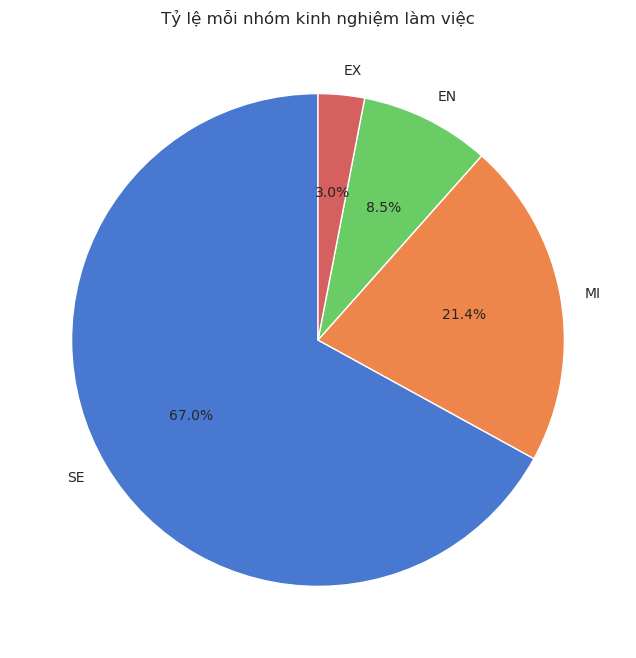

In [59]:
# Tần suất cho cột experience_level
experience_counts = df['experience_level'].value_counts()
print(experience_counts)

# Biểu đồ tròn cho experience_level
plt.figure(figsize=(8, 8))
experience_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ mỗi nhóm kinh nghiệm làm việc')
plt.ylabel('')  # Ẩn nhãn trục y
plt.show()

##### ***Cột `employment_type`***

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64


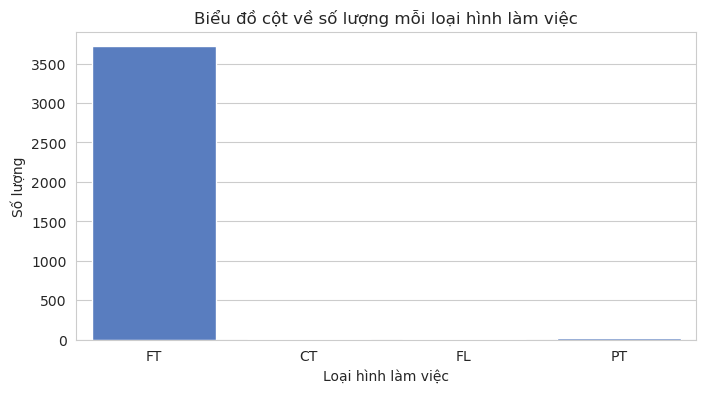

In [60]:
# Tần suất cho cột employment_type
employment_type_counts = df['employment_type'].value_counts()
print(employment_type_counts)

# Biểu đồ cột cho employment_type
plt.figure(figsize=(8, 4))
sns.countplot(x='employment_type', data=df)
plt.title('Biểu đồ cột về số lượng mỗi loại hình làm việc')
plt.xlabel('Loại hình làm việc')
plt.ylabel('Số lượng')
plt.show()

##### ***Cột `job_title`***

In [61]:
# Tần suất cho cột job_title
job_title_counts = df['job_title'].value_counts()
print(job_title_counts)


job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64


##### ***Cột `salary`***

Text(0, 0.5, 'Số lượng')

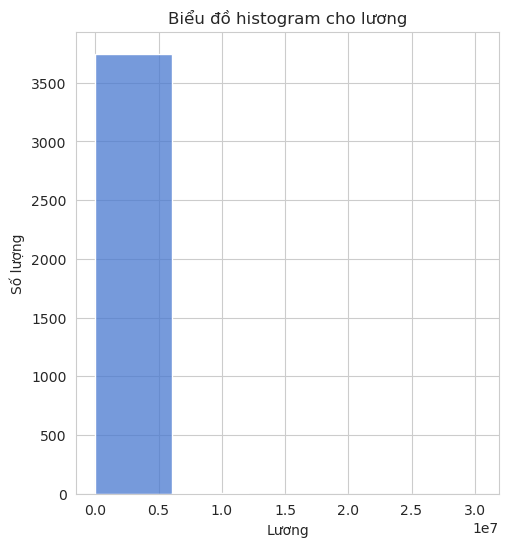

In [62]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['salary'], bins=5)
plt.title('Biểu đồ histogram cho lương')
plt.xlabel('Lương')
plt.ylabel('Số lượng')


##### ***Cột `salary_currency`***

salary_currency
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: count, dtype: int64


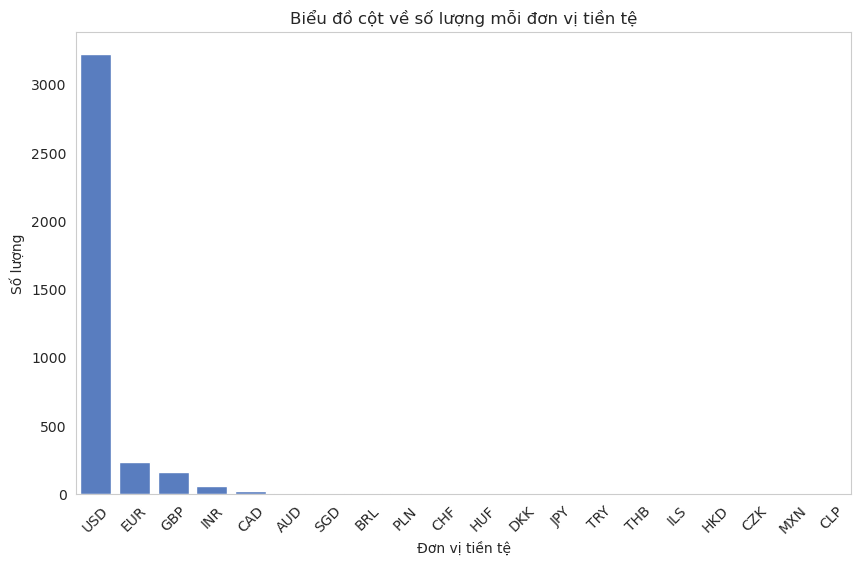

In [63]:
# Tần suất cho cột salary_currency
salary_currency_counts = df['salary_currency'].value_counts()
print(salary_currency_counts)

# Vẽ biểu đồ cột cho cột salary_currency
plt.figure(figsize=(10, 6))
sns.countplot(x='salary_currency', data=df, order=df['salary_currency'].value_counts().index)
plt.title('Biểu đồ cột về số lượng mỗi đơn vị tiền tệ')
plt.xlabel('Đơn vị tiền tệ')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)  # Xoay nhãn trục x nếu cần
plt.grid(axis='y')  # Thêm lưới cho trục y để dễ nhìn
plt.show()



##### ***Cột `salary_in_usd`***

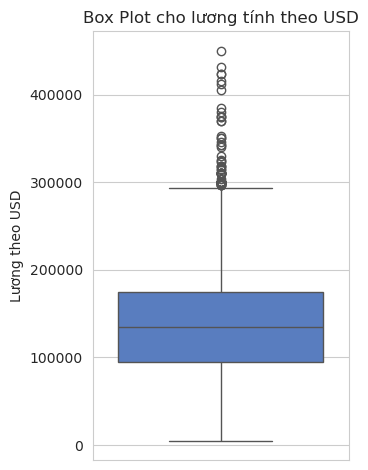

In [64]:
plt.subplot(1, 2, 2)
sns.boxplot(y=df['salary_in_usd'])
plt.title('Box Plot cho lương tính theo USD')
plt.ylabel('Lương theo USD')

plt.tight_layout()
plt.show()


##### ***Cột `employee_residence`***

In [65]:
# Tần suất cho cột employee_residence
employee_residence_counts = df['employee_residence'].value_counts()
print(employee_residence_counts)


employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: count, Length: 78, dtype: int64


##### ***Cột `remote_ratio`***

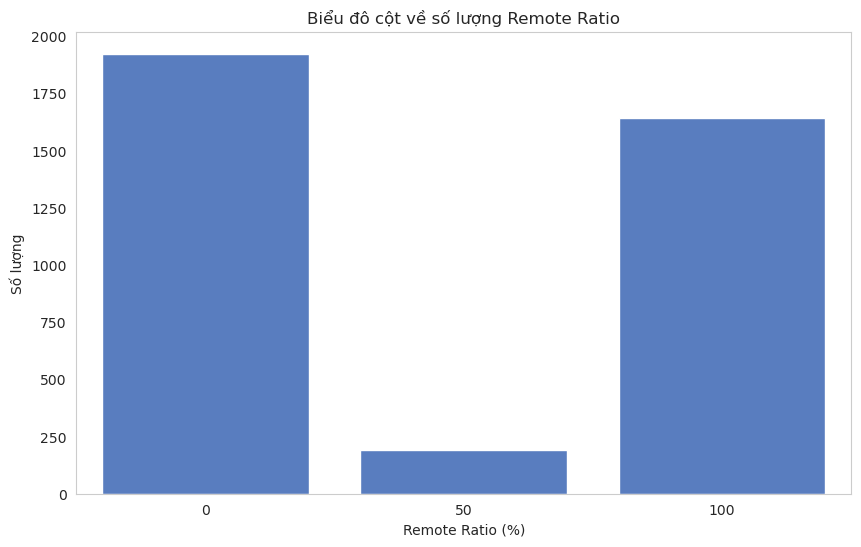

In [66]:
# Nhóm remote_ratio và tính tần suất
remote_ratio_counts = df['remote_ratio'].value_counts().sort_index()

# Vẽ biểu đồ cột cho remote_ratio
plt.figure(figsize=(10, 6))
sns.barplot(x=remote_ratio_counts.index, y=remote_ratio_counts.values)
plt.title('Biểu đô cột về số lượng Remote Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Số lượng')
plt.grid(axis='y')  # Thêm lưới cho trục y để dễ nhìn
plt.show()


##### ***Cột `company_location`***

In [67]:
# Tần suất cho cột company_location
company_location_counts = df['company_location'].value_counts()
print(company_location_counts)

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: count, Length: 72, dtype: int64


##### ***Cột `company_size`***

company_size
M    3153
L     454
S     148
Name: count, dtype: int64


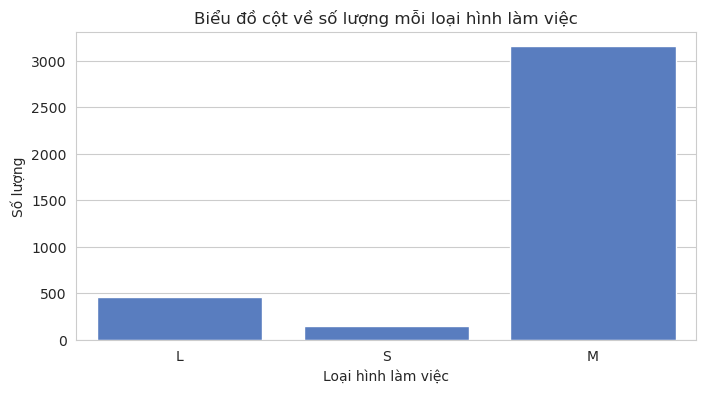

In [68]:
# Tần suất cho cột company_size
employment_type_counts = df['company_size'].value_counts()
print(employment_type_counts)

# Biểu đồ cột cho employment_type
plt.figure(figsize=(8, 4))
sns.countplot(x='company_size', data=df)
plt.title('Biểu đồ cột về số lượng mỗi loại hình làm việc')
plt.xlabel('Loại hình làm việc')
plt.ylabel('Số lượng')
plt.show()

### ***2.5.tiền xử lý dữ liệu***

* Kiểm tra xem có dữ liệu bị thiếu không

In [69]:
# Check if data is null
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

* Kiểm tra xem dữ liệu có bị trùng lắp không

In [70]:
# Check for duplication
df.duplicated().sum()

1171

* Phát hiện trùng lắp dữ liệu => xóa bỏ trùng lắp bằng câu lệnh:

In [71]:
# Eraser duplication
df.drop_duplicates(inplace=True)

* Kiểm tra kích thước của tập dữ liệu

In [72]:
# Size of dataset
df.shape

(2584, 11)

## ***3.Khám phá các mối quan hệ trong dữ liệu***

### ***3.1.Khám phá mối quan hệ đơn thuộc tính***

In [73]:
def show_value(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

#### ***Thuộc tính `Experience Level`***

/tmp/ipykernel_17557/1452088449.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




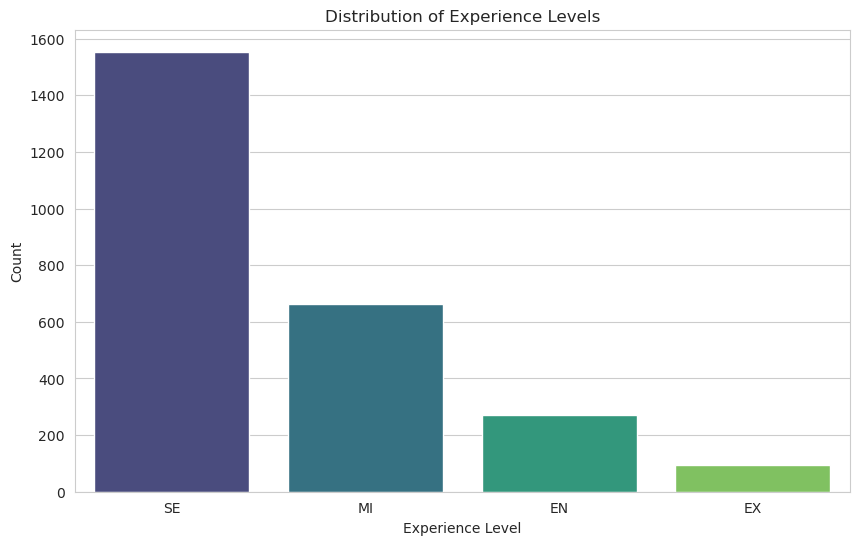

In [74]:
# Experience Level
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='experience_level', order=df['experience_level'].value_counts().index, palette='viridis')
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()

- Nhận xét : Dữ liệu cho thấy phần lớn nhân viên có mức độ kinh nghiệm là "SE" (Senior Level), tiếp theo là "MI" (Mid Level). Số lượng nhân viên có kinh nghiệm "EN" (Entry Level) và "EX" (Executive Level) ít hơn.

#### ***Thuộc tính `Employment Type`***

/tmp/ipykernel_17557/3562953744.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




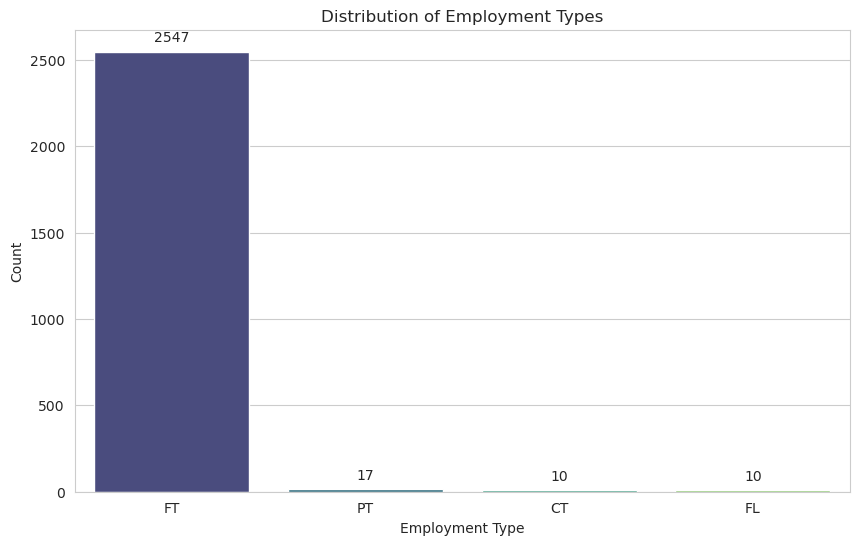

In [75]:
# Employment Type
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='employment_type', order=df['employment_type'].value_counts().index, palette='viridis')
show_value(ax)
plt.title('Distribution of Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()

- Nhận xét : loại nhân viên "FT" (Full-Time) chiếm ưu thế vượt trội, với rất ít trường hợp "PT" (Part-Time), "CT" (Contract), và "FL" (Freelance).

#### ***Thuộc tính ` Job Title`***

/tmp/ipykernel_17557/4043623695.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




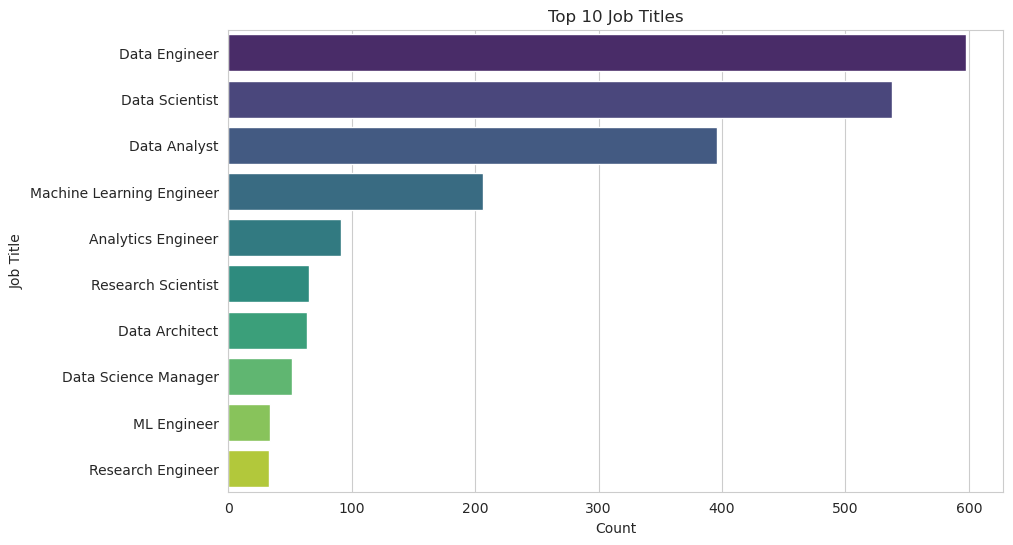

In [76]:
# Job Title
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='job_title', order=df['job_title'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

- Nhận xét: top 10 công việc phổ biến nhất bao gồm các vị trí như Data Scientist, Data Engineer và Data Analyst. Principal Data Scientist và ML Engineer cũng là các vị trí thường gặp.

#### ***Thuộc tính `Salary in USD`***

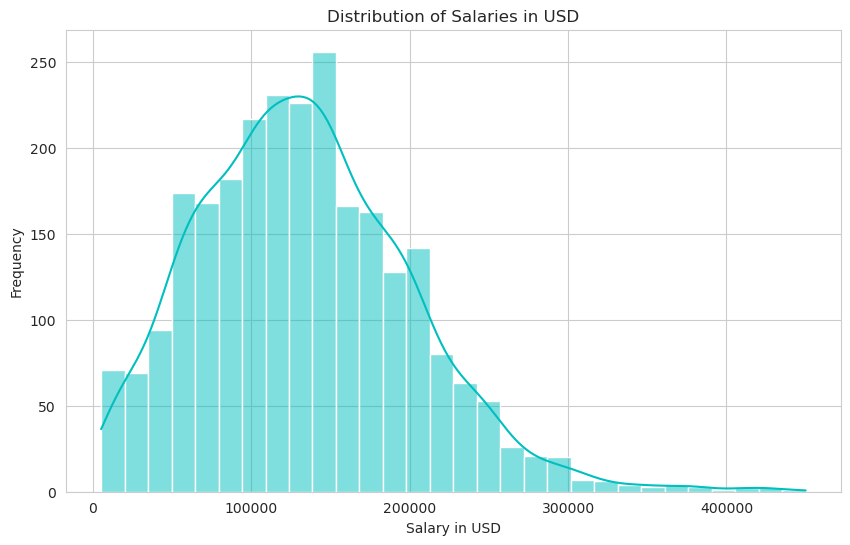

In [77]:
# Salary in USD
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='salary_in_usd', bins=30, kde=True, color='c')
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

- Nhận xét : phân bố mức lương cho thấy dữ liệu có dạng như một phân phối chuẩn bị lệch dương, với phần lớn mức lương tập trung ở khoảng thấp. Có một số điểm ngoại lệ với mức lương rất cao, cho thấy sự chênh lệch trong lương của các vị trí khác nhau.

#### ***Thuộc tính `Remote Ratio`***

/tmp/ipykernel_17557/3248452634.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




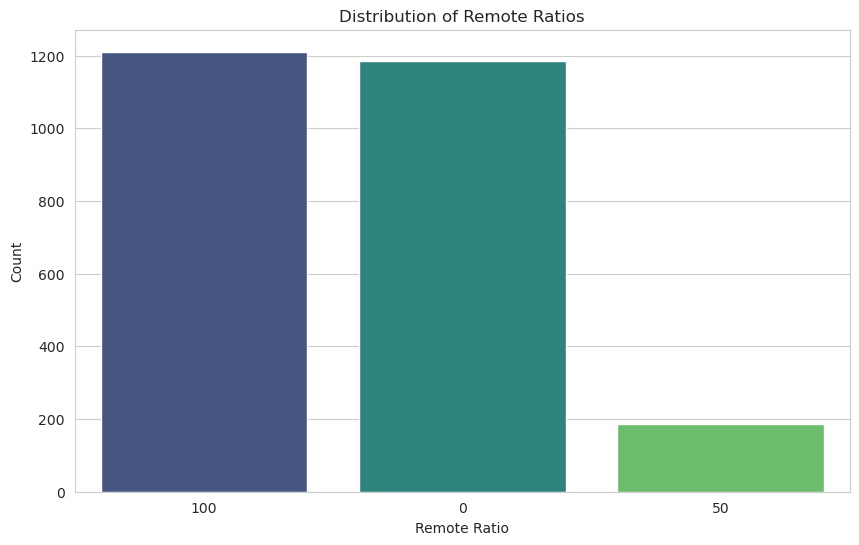

In [78]:
# Remote Ratio
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='remote_ratio', order=df['remote_ratio'].value_counts().index, palette='viridis')
plt.title('Distribution of Remote Ratios')
plt.xlabel('Remote Ratio')
plt.ylabel('Count')
plt.show()

- Nhận xét : đa số các công việc là làm việc ở nhà hoặc là làm trực tiếp hoàn toàn. Có rất ít công việc mà nửa làm trực tiếp, nửa làm ở nhà.

#### ***Thuộc tính `Company Location`***

/tmp/ipykernel_17557/2453440209.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




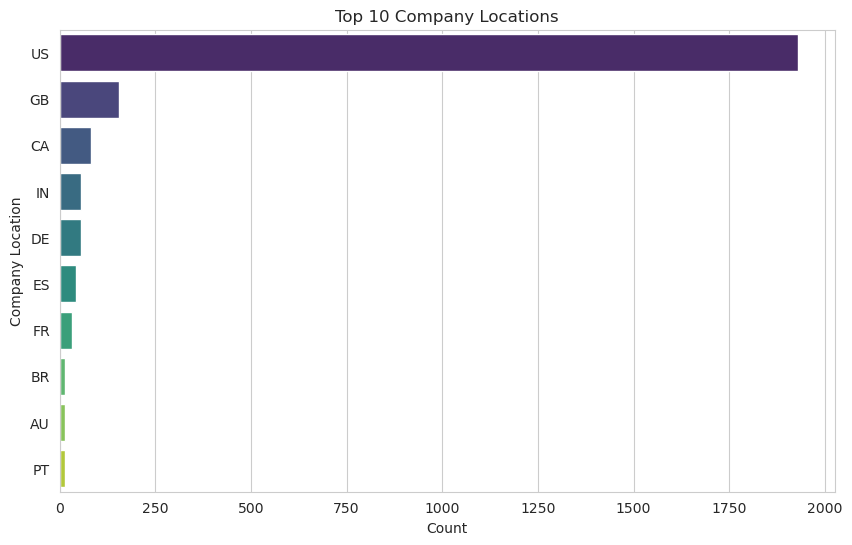

In [79]:
# Company Location
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='company_location', order=df['company_location'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Company Locations')
plt.xlabel('Count')
plt.ylabel('Company Location')
plt.show()

- Nhận xét : có thể thấy các công ty tập trung ở Mỹ là nhiều, điều này có thể là do dữ liệu được lấy chủ yếu ở Mỹ

#### ***Thuộc tính `Company Size`***

/tmp/ipykernel_17557/3966953205.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




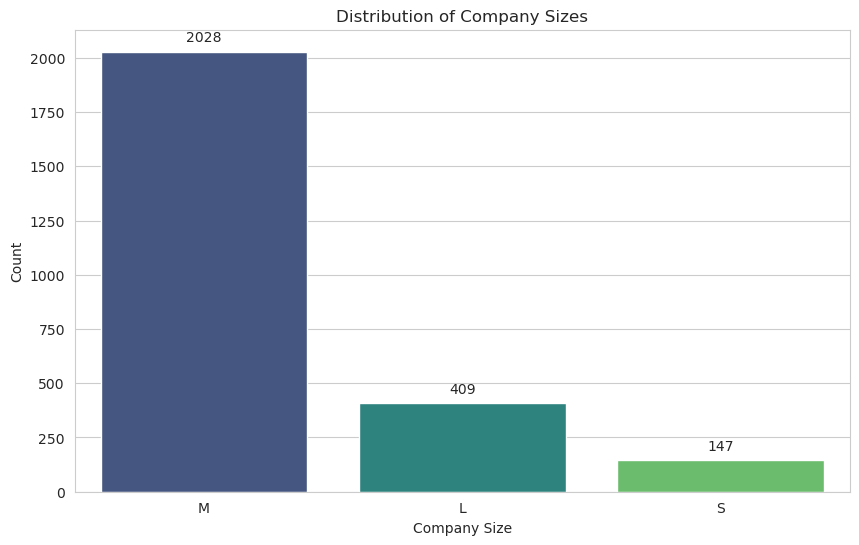

In [80]:
# Company Size
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='company_size', order=df['company_size'].value_counts().index, palette='viridis')
show_value(ax)
plt.title('Distribution of Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.show()

- Nhận xét: dữ liệu khá cân bằng về quy mô công ty, với các công ty có quy mô vừa (M) và lớn (L) phổ biến hơn so với các công ty nhỏ (S).

### ***3.2.Khám phá mối quan hệ đa thuộc tính***

#### ***3.2.1.Phân Tích Số Lượng Công Việc và Mức Lương Trung Bình Theo Chức Danh Nghề Nghiệp Trong Ngành Khoa Học Dữ Liệu***

/tmp/ipykernel_17557/554015397.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




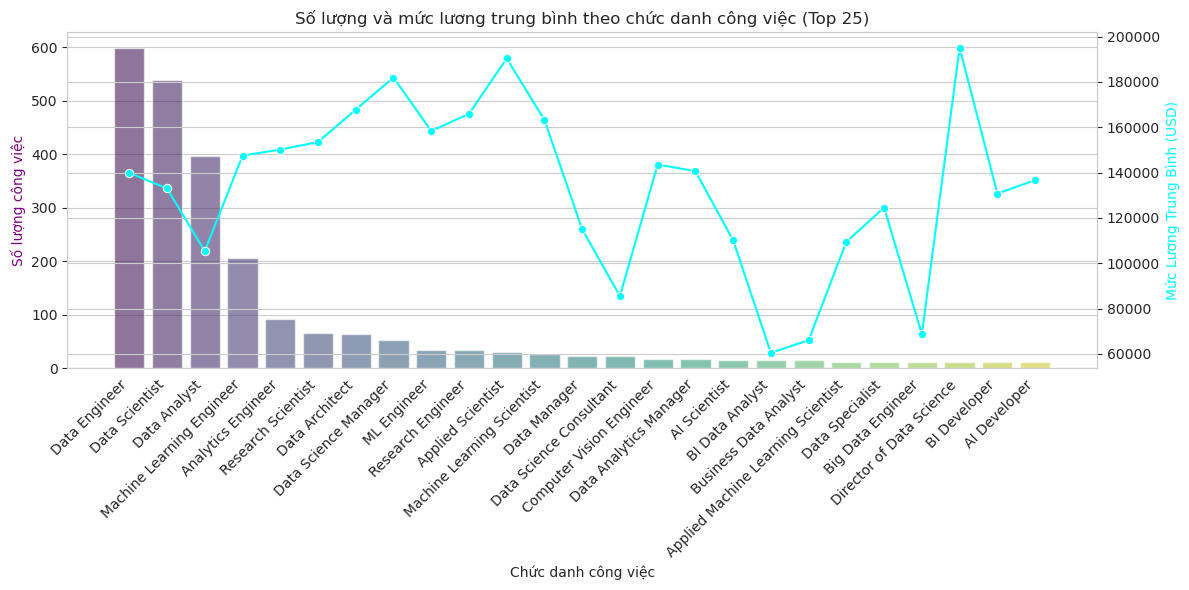

In [81]:
counts=df['job_title'].value_counts().head(25)

# Filter the DataFrame based on job titles in counts.index
filtered_df = df[df['job_title'].isin(counts.index)]

# Group by job_title and calculate the average salary
average_salary = filtered_df.groupby('job_title')['salary_in_usd'].mean()

# Create a DataFrame
combined_df = pd.DataFrame({'count': counts, 'average_salary': average_salary})
combined_df = combined_df.sort_values(by='count', ascending=False)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for counts
sns.barplot(x=combined_df.index, y='count', data=combined_df, ax=ax1, palette='viridis', alpha=0.6)
plt.xticks(rotation=45, ha='right')

# Create a second y-axis
ax2 = ax1.twinx()

# Line plot for average salary
sns.lineplot(x=combined_df.index, y='average_salary', data=combined_df, ax=ax2, color='cyan', marker='o')

# Customize axes
ax1.set_ylabel('Số lượng công việc', color='purple')
ax2.set_ylabel('Mức Lương Trung Bình (USD)', color='cyan')
ax1.set_xlabel('Chức danh công việc')
plt.title('Số lượng và mức lương trung bình theo chức danh công việc (Top 25)')

# Ensure x-ticks align with the bars
# ax1.set_xticks(range(len(combined_df.index)))  # Set the positions of the ticks
# ax1.set_xticklabels(combined_df.index, rotation=45, ha='right')  # Set the tick labels and rotate them

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


##### ***Phân Tích Số Lượng Công Việc và Mức Lương Trung Bình Theo Chức Danh Nghề Nghiệp Trong Ngành Khoa Học Dữ Liệu***

- Biểu đồ này nhằm tìm hiểu số lượng công việc và mức lương trung bình tương ứng cho mỗi chức danh công việc trong ngành Khoa Học Dữ Liệu. Những thông tin này sẽ giúp sinh viên nhận định về thị trường lao động trong ngành dữ liệu và hỗ trợ đưa ra quyết định phát triển kỹ năng phù hợp với nhu cầu và xu hướng lương, giúp định hướng nghề nghiệp tương lai.

**Loại Biểu Đồ Sử Dụng:**  
- **Biểu đồ cột:** Thể hiện số lượng công việc cho từng chức danh.
- **Biểu đồ đường:** Thể hiện mức lương trung bình tương ứng cho các chức danh đó.

**Lý do lựa chọn biểu đồ cột kết hợp với biểu đồ đường:**
- Em sử dụng biểu đồ cột (đối với số lượng công việc) kết hợp với biểu đồ đường (đối với mức lương trung bình). Lý do là vì để thể hiện sự so sánh rõ nhất giữa các chức danh nghề nghiệp này. Nói về biểu đồ để so sánh thì ngoài biểu đồ cột và đường ra còn có biểu đồ tròn, nhưng biểu đồ tròn phù hợp hơn trong việc thể hiện tỷ lệ, cơ cấu. Tập dữ liệu này có rất nhiều chức danh nghề nghiệp vì vậy nếu biểu diễn bằng biểu đồ tròn sẽ không được trực quan. Hơn hết biểu đồ tròn không thể cho ta thấy liền được số lượng công việc cụ thể nên em không chọn biểu đồ tròn. Biểu đồ cột và đường lại rất phù hợp cho việc này, không chỉ thể hiện được số lượng mà còn dễ dàng so sánh. Lý do em chọn biểu đồ cột kết hợp với biểu đồ đường mà không phải 2 biểu đồ cột hoặc 2 biểu đồ đường là vì để tăng thêm sự đa dạng biểu đồ khiến cho thu hút hơn. Và vì có rất nhiều chức danh nghề nghiệp nên nếu vẽ biểu đồ cột đôi thì lại quá nhiều cột, khó mà quan sát.

---

##### **Phân Tích**
##### 1. Phân Bố Số Lượng Công Việc Theo Chức Danh
- Số lượng công việc giữa các chức danh nghề nghiệp có sự khác biệt rõ rệt. Các chức danh phổ biến hơn có cột biểu đồ cao hơn, phản ánh nhu cầu của thị trường lao động:
- Những công việc liên quan đến phân tích và triển khai mô hình máy học, như **Data Scientist**, **Data Engineer**, và **Machine Learning Engineer**, có số lượng lớn hơn, cho thấy thị trường đang gia tăng nhu cầu cho các vị trí này.

*=> Khoa học Dữ liệu và Machine Learning đang phát triển mạnh mẽ, dẫn đến sự gia tăng nhu cầu về các công việc phân tích dữ liệu và kỹ thuật máy học.*

##### 2. Mức Lương Trung Bình và Sự Khác Biệt Giữa Các Ngành
Mức lương trung bình có sự chênh lệch lớn giữa các vị trí, cho thấy các yêu cầu khác nhau về độ phức tạp và kỹ năng:
- Những vị trí yêu cầu chuyên môn cao, như **Machine Learning Engineer** và **AI Scientist**, có mức lương trung bình cao hơn.
- Các vị trí như **Data Architect** hoặc **Data Science Manager** cũng có mức lương cao, do yêu cầu về kỹ năng quản lý dữ liệu và lập kế hoạch hệ thống, cùng khả năng lãnh đạo.

##### 3. Mối Liên Hệ Giữa Số Lượng Công Việc và Mức Lương
- Một số vị trí có số lượng công việc lớn nhưng mức lương trung bình thấp hơn, như **Data Analyst** hoặc **Business Intelligence Analyst**. Điều này có thể là do công việc dễ tiếp cận hơn và chỉ yêu cầu kỹ năng cơ bản.
- Ngược lại, các vai trò có số lượng ít nhưng mức lương cao hơn, như **Data Architect** hoặc **Machine Learning Researcher**, thường yêu cầu kỹ năng chuyên sâu, kinh nghiệm và kiến thức rộng về thuật toán, lập trình, và triển khai mô hình.

*=> Các vị trí này đòi hỏi chuyên môn cao và thường là những công việc yêu cầu nhiều kinh nghiệm và khả năng chuyên môn hóa.*

---

##### ***Kết luận***
Dựa trên biểu đồ này, sinh viên có thể đưa ra định hướng phát triển kỹ năng và lựa chọn nghề nghiệp trong lĩnh vực Khoa Học Dữ Liệu phù hợp với xu hướng thị trường.

#### ***3.2.2.Phân Tích Số Lượng Công Việc ứng với các Mức Độ Kinh Nghiệm Làm Việc Theo Chức Danh Nghề Nghiệp Trong Ngành Khoa Học Dữ Liệu***

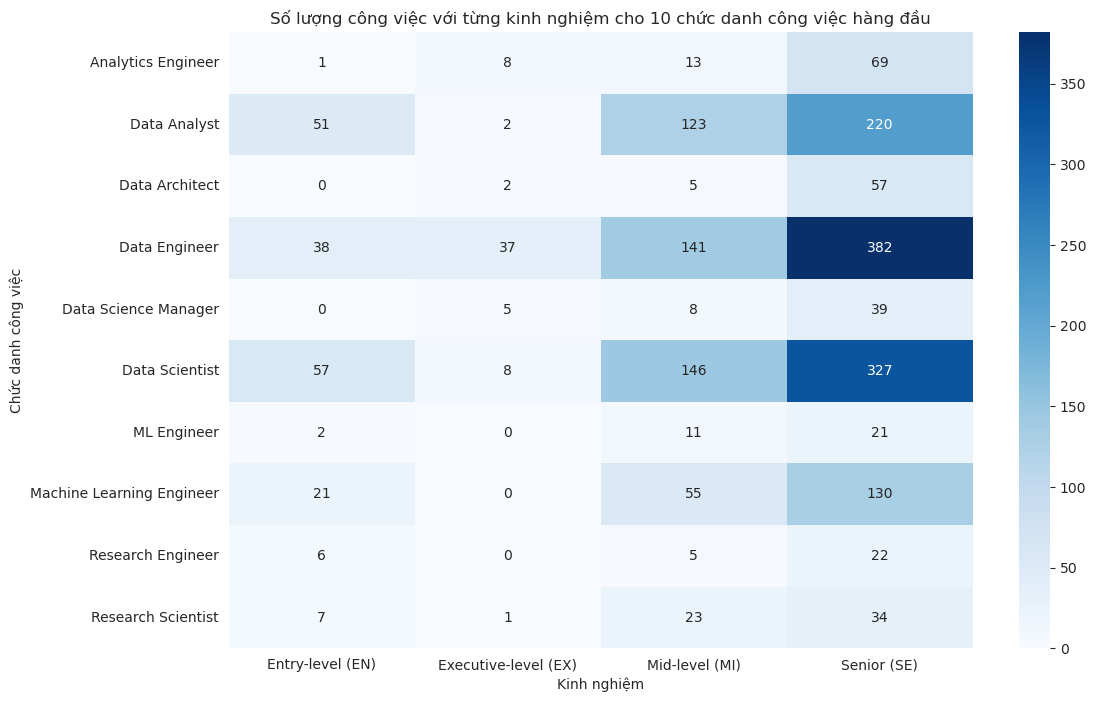

In [82]:
# Bước 1: Tìm 10 tiêu đề công việc hàng đầu
top_10_job_titles = df['job_title'].value_counts().head(10).index

# Bước 2: Lọc dữ liệu chỉ cho những tiêu đề công việc hàng đầu
filtered_df = df[df['job_title'].isin(top_10_job_titles)]

# Bước 3: Tạo bảng tổng hợp (pivot table)
heatmap_data = filtered_df.pivot_table(index='job_title', columns='experience_level', aggfunc='size', fill_value=0)

# Bước 4: Tạo heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')

# Thay đổi nhãn trên trục x
new_labels = ['Entry-level (EN)', 'Executive-level (EX)', 'Mid-level (MI)', 'Senior (SE)']
heatmap.set_xticklabels(new_labels, rotation=0, ha='center')

plt.title('Số lượng công việc với từng kinh nghiệm cho 10 chức danh công việc hàng đầu')
plt.xlabel('Kinh nghiệm')
plt.ylabel('Chức danh công việc')
plt.show()

##### ***Phân Tích Số Lượng Công Việc ứng với các Mức Độ Kinh Nghiệm Làm Việc Theo Chức Danh Nghề Nghiệp Trong Ngành Khoa Học Dữ Liệu***

Biểu đồ này nhằm tìm hiểu số lượng công việc qua từng mức độ kinh nghiệm tương ứng cho mỗi chức danh công việc trong ngành Khoa Học Dữ Liệu. Những thông tin này sẽ giúp sinh viên nhận định về thị trường lao động trong ngành dữ liệu và hỗ trợ đưa ra quyết định vị trí dễ kiếm việc khi ra trường (thường là `Entry level`) để rồi có thể dần chuyển qua các vị trí khác khi đã có đủ kinh nghiệm

**Loại Biểu Đồ Sử Dụng:**  
- **Biểu đồ heatmap:** Thể hiện số lượng công việc cho từng chức danh và mức kinh nghiệm tương ứng

- **Lý do lựa chọn biểu đồ cột heatmap:**
Vì Heatmap là một trong những biểu đồ thích hợp để biểu diễn mối quan hệ giữa các biến. Ngoài heatmap thì còn có các biểu đồ scatter (biểu đồ phân tán) và biểu đồ bubble (biểu đồ bong bóng), ... Nhưng 2 biểu đồ trên khó có thể cho được một số lượng cụ thể chính xác về số lượng công việc nên em đã không lựa chọn. Hoặc có thể sử dụng các biểu đồ khác nữa nhưng có thể gây khó cho người không có đủ kiến thức có thể quan sát, nên em chọn Heatmap là biểu đồ thích hợp nhất, phù hợp với đa số mọi ngừoi

---

##### ***Phân Tích***
##### 1. Phân Bố Nhu Cầu Công Việc Theo Cấp Độ Kinh Nghiệm (Experience Level Demand)
Các công việc trong lĩnh vực khoa học dữ liệu thường có nhiều cấp độ kinh nghiệm từ `Entry-level` (EN) đến `Senior` (SE), phản ánh nhu cầu đa dạng của thị trường lao động:
- `Entry-level` (EN): Các công việc có cấp độ này thường chiếm tỷ lệ lớn trong các chức danh phổ biến như `Data Analyst` và `Data Engineer`. Điều này có thể cho thấy đây là các vai trò dễ tiếp cận cho những người mới vào ngành, vì yêu cầu về kỹ năng có thể ít phức tạp hơn so với các cấp bậc cao hơn.
- Các cấp độ kinh nghiệm cao hơn như `Senior` hoặc `Executive-level` có xu hướng xuất hiện nhiều hơn ở những chức danh có yêu cầu chuyên môn cao như `Machine Learning Engineer` hoặc `Data Architect`. Các công việc này thường cần kiến thức và kỹ năng chuyên sâu về dữ liệu và kỹ thuật, và ít phù hợp hơn với người mới.

##### 2. Mối Quan Hệ Giữa Chức Danh Công Việc và Cấp Độ Kinh Nghiệm (Job Title vs. Experience Level)
Một số chức danh có sự phân bổ đồng đều ở nhiều cấp độ kinh nghiệm, trong khi những chức danh khác tập trung chủ yếu vào một vài cấp độ nhất định:
- `Data Engineer`, `Data Analyst` và `Data Scientist` thường có sự phân bổ đều từ Entry-level đến Mid-level. Điều này có thể là do các vai trò này xuất hiện ở nhiều lĩnh vực khác nhau, từ doanh nghiệp nhỏ đến tập đoàn lớn, đòi hỏi các cấp độ kinh nghiệm khác nhau.
- Ngược lại, `Data Architect` và `Machine Learning Engineer` tập trung ở `Mid-level` và `Senior`, cho thấy những vai trò này có xu hướng tuyển dụng các chuyên gia có kinh nghiệm hơn.

##### 3. Quy Luật Tuyển Dụng và Xu Hướng Thăng Tiến (Hiring Trends and Career Progression)
- Có thể thấy rằng các công việc chuyên sâu như `Machine Learning Engineer` hoặc `Data Scientist` thường có nhiều cơ hội cho người có kinh nghiệm (Senior và Executive). Điều này phản ánh quy luật thị trường khi nhu cầu về chuyên môn hóa cao được đặt lên hàng đầu.
- Các công việc phổ biến hơn và có lộ trình thăng tiến rõ ràng như `Data Analyst` và `Data Engineer` tạo cơ hội cho nhiều cấp độ, từ Entry-level đến Senior. Đây là con đường tốt cho những ai muốn bắt đầu và thăng tiến trong lĩnh vực dữ liệu.

---

##### ***Kết luận***
Nhìn chung, số lượng công việc dành cho Entry-Level khá ít, điều này làm tăng tỷ lệ cạnh tranh việc làm ở mức độ này, nhất là đối với các bạn sinh viên ngành Khoa Học Dữ Liệu mới ra trường. Tuy nhiên khi đã có kinh nghiệm, số lượng công việc cho cấp `Senior` trở lên khá nhiều và đa dạng, thể hiện mức độ cạnh tranh đã giảm và nhiều cơ hội thăng tiến trong nghề nghiệp
- Các công việc dễ tiếp cận cho người mới thường là `Data Analyst` và `Data Engineer`, vì có nhiều cơ hội ở cấp `Entry-level` và `Mid-level`.
- Các công việc cần chuyên môn sâu hơn và kinh nghiệm như `Data Architect` và `Machine Learning Engineer` thường đòi hỏi cấp độ `Senior` hoặc `Executive`.

Tóm lại, mức độ yêu cầu kinh nghiệm có sự khác biệt rõ ràng giữa các chức danh công việc, phản ánh quy luật thị trường và xu hướng phát triển trong lĩnh vực dữ liệu.

#### ***3.2.3.Phân Tích Mức Lương Trung Bình của tất cả các ngành nghề thuộc Khoa Học Dữ Liệu qua các năm (2020 - 2023)***

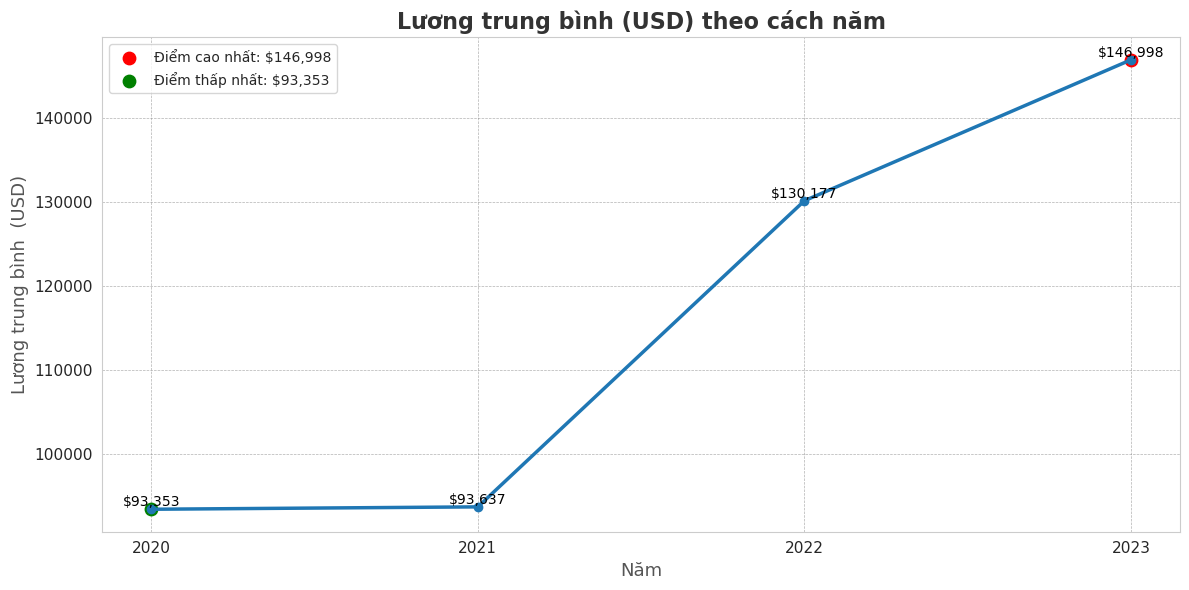

In [83]:
# Nhóm dữ liệu theo 'work_year' và tính lương trung bình cho mỗi năm
average_salary_per_year = df.groupby('work_year')['salary_in_usd'].mean()

# Thiết lập phong cách và bảng màu cho biểu đồ
sns.set_style("whitegrid")  # Đặt nền có lưới trắng
sns.set_palette("muted")    # Chọn bảng màu nhẹ nhàng

# Vẽ biểu đồ đường
plt.figure(figsize=(12, 6))
plt.plot(
    average_salary_per_year.index, 
    average_salary_per_year.values, 
    marker='o', 
    color='#1f77b4',      # Chọn màu cho đường biểu đồ
    linestyle='-', 
    linewidth=2.5         # Đặt độ dày của đường để dễ nhìn hơn
)

# Thêm nhãn dữ liệu (lương trung bình) tại mỗi điểm
for x, y in zip(average_salary_per_year.index, average_salary_per_year.values):
    plt.text(x, y, f'${y:,.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Tùy chỉnh tiêu đề và nhãn trục
plt.title('Lương trung bình (USD) theo cách năm', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Năm', fontsize=13, color='#555555')
plt.ylabel('Lương trung bình  (USD)', fontsize=13, color='#555555')

# Thêm lưới và định dạng các tick
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray', alpha=0.6)
plt.xticks(average_salary_per_year.index, fontsize=11)
plt.yticks(fontsize=11)

# Đánh dấu điểm lương cao nhất và thấp nhất
plt.scatter(
    average_salary_per_year.idxmax(), 
    average_salary_per_year.max(), 
    color='red', 
    s=80, 
    label=f'Điểm cao nhất: ${average_salary_per_year.max():,.0f}'
)
plt.scatter(
    average_salary_per_year.idxmin(), 
    average_salary_per_year.min(), 
    color='green', 
    s=80, 
    label=f'Điểm thấp nhất: ${average_salary_per_year.min():,.0f}'
)

# Thêm chú thích (legend) cho các điểm nổi bật
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

##### ***Phân Tích Mức Lương Trung Bình của tất cả các ngành nghề thuộc Khoa Học Dữ Liệu qua các năm (2020 - 2023)***

Biểu đồ này phân tích mức lương trình bình của các ngành nghề thuộc lĩnh vực khoa học dữ liệu qua các năm 2020 - 2023. Từ đó có thể dự đoán xu hướng trong tư lai

**Loại Biểu Đồ Sử Dụng:**  
- **Biểu đồ đường:** Thể hiện mức lương trung bình qua các năm

- **Lý do lựa chọn biểu đồ cột heatmap:**
Để thể hiện sự thay đổi của 1 biến theo thời gian thì biểu đồ đường là phù hợp nhất, vì nó thể hiện độ dốc của đường dữ liệu giúp thấy rõ sự tăng/ giảm nhanh hay chậm của dữ liệu. Điều này khó có thể làm được với biểu đồ cột

---

##### **Phân Tích**
##### 1. Tăng trưởng lương qua các năm
- **2020-2021**: Mức lương trung bình tăng nhẹ, từ khoảng $92,303 lên $94,087. Đây là mức tăng không đáng kể, cho thấy lương không có biến động mạnh trong giai đoạn này.

- **2021-2022**: Mức lương tăng mạnh hơn đáng kể, từ $94,087 lên $133,339. Đây là một mức tăng lớn, có thể liên quan đến sự gia tăng nhu cầu cho các vị trí công việc, đặc biệt trong ngành công nghệ, dữ liệu và các ngành liên quan.

- **2022-2023**: Mức lương tiếp tục tăng, lên đến $149,046. Tuy tốc độ tăng vẫn mạnh, nhưng không bằng giai đoạn 2021-2022.
##### 2. Lý giải:
- **Đại dịch COVID-19**: Năm 2020 là thời điểm đại dịch bắt đầu và gây ra nhiều khó khăn cho nền kinh tế. Các công ty hạn chế tuyển dụng, tập trung cắt giảm chi phí, dẫn đến mức lương không có sự thay đổi lớn.

- **Nhu cầu chuyển đổi số và tăng trưởng thị trường việc làm từ xa**: Sau đại dịch, có sự bùng nổ trong nhu cầu chuyển đổi số, đặc biệt trong các ngành công nghệ, tài chính, y tế. Điều này đẩy nhu cầu tuyển dụng nhân lực IT, kỹ sư phần mềm và các chuyên gia kỹ thuật tăng cao. Các công ty sẵn sàng trả mức lương cao để thu hút nhân tài, dẫn đến mức lương trung bình tăng mạnh trong giai đoạn 2021-2022.

- **Điều chỉnh và ổn định lại**: Đến năm 2023, mặc dù nhu cầu nhân lực vẫn cao, các công ty bắt đầu điều chỉnh lại mức chi trả lương để duy trì ổn định tài chính, tránh tăng trưởng quá nóng. Điều này dẫn đến mức lương vẫn tăng nhưng với tốc độ chậm hơn so với giai đoạn trước, hoặc có thể là do thị trường tuyển dụng dần bão hòa

##### 3. Dự đoán và xu hướng trong tương lai:

Nếu thị trường việc làm tiếp tục ổn định, có thể mức lương sẽ tiếp tục tăng nhưng với tốc độ vừa phải. Tuy nhiên, nếu có các yếu tố ảnh hưởng lớn (như sự ra đời của công nghệ mới hoặc khủng hoảng kinh tế), xu hướng này có thể thay đổi.

---

##### ***Kết luận***

Biểu đồ phản ánh sự phát triển kinh tế và nhu cầu nhân lực trong ngành công nghiệp. Giai đoạn tăng trưởng nhanh sau đại dịch có thể sẽ chậm lại, nhưng mức lương trung bình có khả năng vẫn duy trì mức tăng đều đặn, phù hợp với xu hướng cạnh tranh trong thị trường lao động có kỹ năng cao.

#### ***3.2.4.Phân Tích Số Lượng Công Việc Làm Việc Từ Xa Theo Từng Năm (2020 - 2023)***

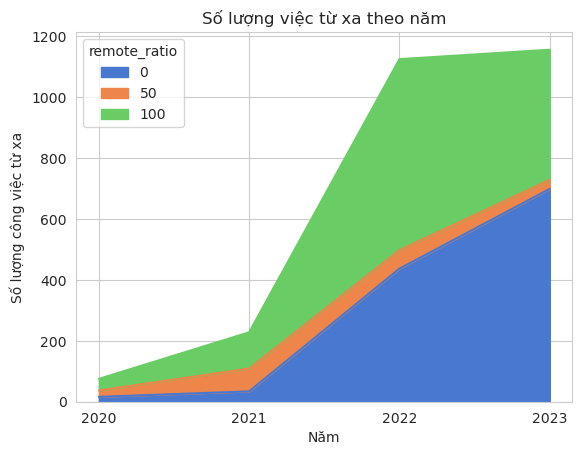

In [84]:
# Nhóm dữ liệu theo năm làm việc và số lượng làm việc từ xa, sau đó đếm số lượng
remote_rate_by_year = df.groupby(['work_year', 'remote_ratio']).size().unstack(fill_value=0)

# Vẽ biểu đồ area chart
fig, ax = plt.subplots()
remote_rate_by_year.plot(kind='area', stacked=True, ax=ax)

# Đặt nhãn và tiêu đề bằng tiếng Việt
ax.set_xlabel('Năm')
ax.set_ylabel('Số lượng công việc từ xa')
ax.set_title('Số lượng việc từ xa theo năm')

# Đảm bảo trục x chỉ hiển thị các năm nguyên
ax.set_xticks(remote_rate_by_year.index)

# Hiển thị biểu đồ
plt.show()

##### ***Phân Tích Số Lượng Công Việc Làm Việc Từ Xa Theo Từng Năm (2020 - 2023)***
Biểu đồ này phân tích mức lương trình bình của các ngành nghề thuộc lĩnh vực khoa học dữ liệu qua các năm 2020 - 2023. Từ đó có thể dự đoán xu hướng trong tư lai

**Loại Biểu Đồ Sử Dụng:**  
- **Biểu đồ Scatter Area Chart:** Thể hiện số lượng công việc làm việc từ xa qua các năm
- **Lý do lựa chọn biểu đồ cột Scatter Area Chart:**
Vì nó giúp trực quan hóa sự thay đổi của số lượng công việc từ xa theo thời gian một cách rõ ràng và dễ hiểu. Biểu đồ này không chỉ hiển thị số lượng công việc từ xa mỗi năm mà còn cho thấy sự phân bố của các tỷ lệ làm việc từ xa (0%, 50%, 100%) qua các năm. Điều này giúp chúng ta dễ dàng nhận thấy xu hướng và sự thay đổi trong cách làm việc từ xa theo thời gian. 
---
##### **Phân Tích**
##### 1. Tăng trưởng lương qua các năm
- **2020-2021**: Có sự gia tăng đột biến trong số lượng công việc từ xa vượt qua cả số lượng công việc làm việc trực tiếp. Điều này cho thấy sự thay đổi lớn trong cách làm việc .

- **2021-2022**: Xu hướng làm việc từ xa tiếp tục tăng, cho thấy rằng nhiều công ty đã nhận ra lợi ích của mô hình này và quyết định duy trì hoặc mở rộng chính sách làm việc từ xa.

- **2022-2023**: Xu hướng làm việc từ xa tiếp tục tăng.

##### 2. Lý giải:
**Đại dịch COVID-19**: Năm 2020 là thời điểm đại dịch bắt đầu và gây ra nhiều khó khăn cho việc đi lại. Các công ty hạn chế tuyển dụng, tập trung. Nhiều công ty đã áp dụng chính sách làm việc từ xa để đối phó với tình hình khẩn cấp.
- **Nhu cầu chuyển đổi số và tăng trưởng thị trường việc làm từ xa**: Sau đại dịch, có sự bùng nổ trong nhu cầu chuyển đổi số, đặc biệt trong các ngành công nghệ, tài chính, y tế. nhiều công ty đã nhận ra lợi ích của mô hình này và quyết định duy trì hoặc mở rộng chính sách làm việc từ xa ngay cả sau khi đại dịch đã được kiểm soát.
##### 3. Dự đoán và xu hướng trong tương lai:
- Dự đoán trong tương lai mô hình làm việc từ xa sẽ phát triển, quá trình làm việc sẽ  trở nên linh hoạt và tự do hơn, mang lại nhiều lợi ích cho người lao động và doanh nghiệp như chi phí cơ sở hạ tầng, chi phí  đi lại, thời gian làm việc linh hoạt, tăng năng suất lao động, giảm tỷ lệ bỏ.

---
##### ***Kết luận***
Biểu đồ cho thấy làm việc từ xa đã trở thành một xu hướng tất yếu và sẽ tiếp tục phát triển trong tương lai. Để thích ứng với xu hướng này, các doanh nghiệp và người lao động cần phải thay đổi tư duy và hành vi làm việc của mình.


#### ***3.2.5.Phân Tích Số Lượng Công Việc Của Từng Lĩnh Vực Ngành Khoa Học Dữ Liệu Theo Tỉ lệ Làm Việc Từ xa***

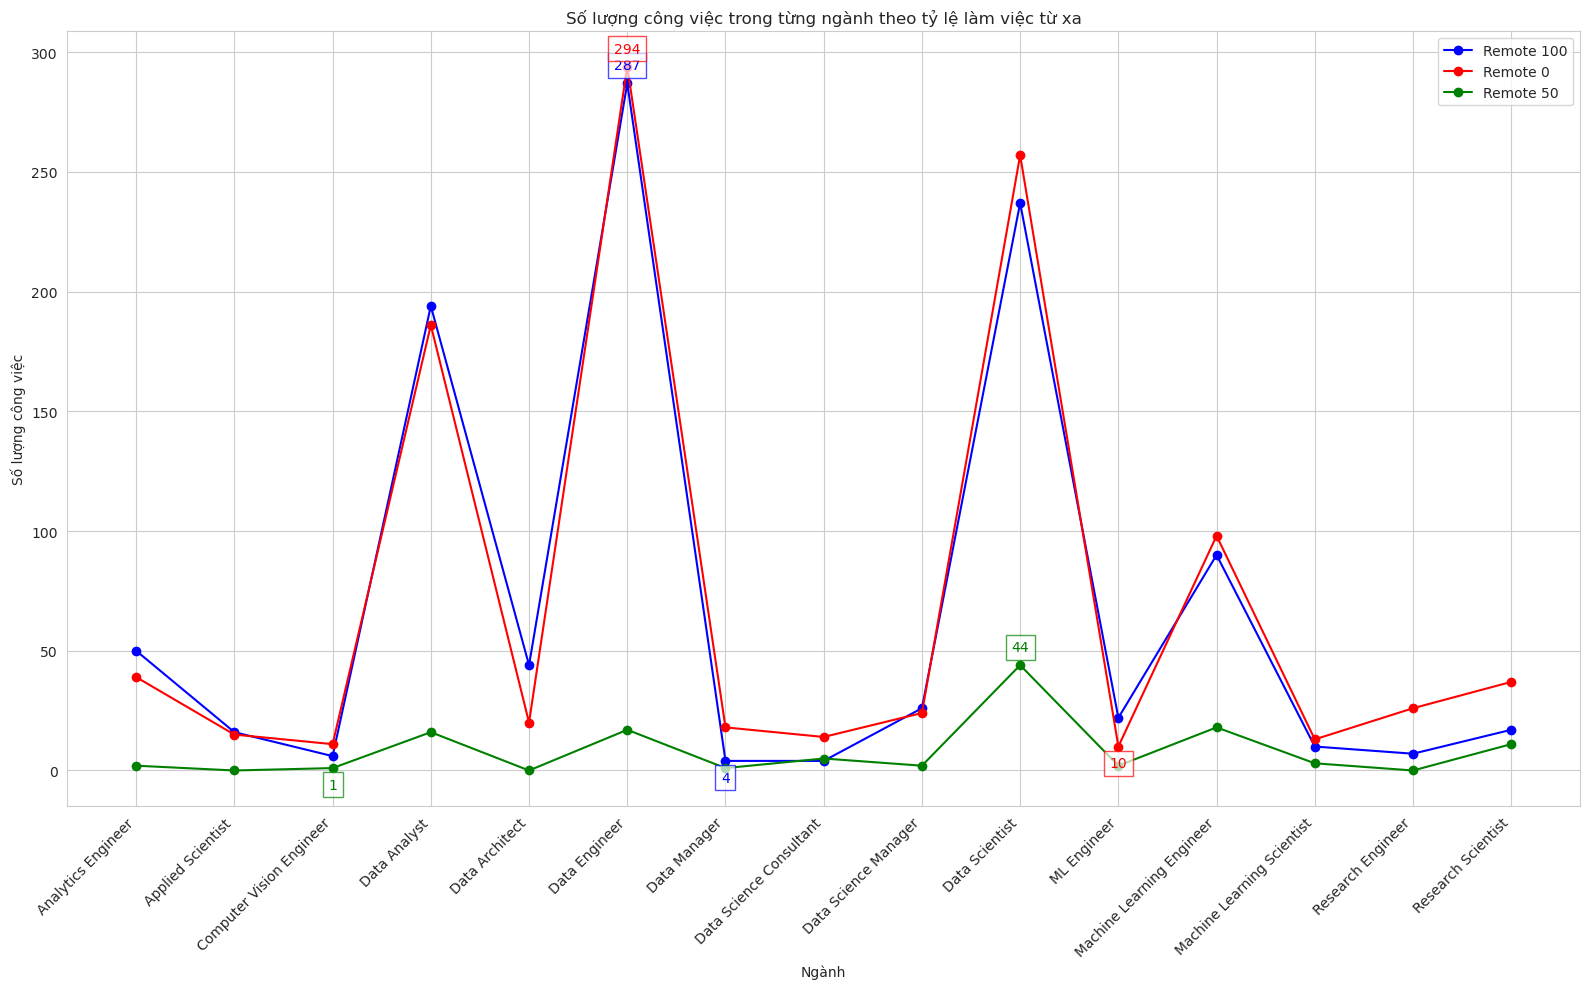

In [85]:
# Đếm số lượng công việc trong từng ngành và chọn 15 ngành có số lượng lớn nhất
top_15_jobs = df['job_title'].value_counts().nlargest(15).index

# Lọc dữ liệu theo tỷ lệ làm việc từ xa và ngành cụ thể
df_selected = df[df['job_title'].isin(top_15_jobs)]
df_remote_100 = df_selected[df_selected['remote_ratio'] == 100]
df_remote_0 = df_selected[df_selected['remote_ratio'] == 0]
df_remote_50 = df_selected[df_selected['remote_ratio'] == 50]

# Đếm số lượng công việc trong từng ngành
count_remote_100 = df_remote_100['job_title'].value_counts()
count_remote_0 = df_remote_0['job_title'].value_counts()
count_remote_50 = df_remote_50['job_title'].value_counts()

# Tạo DataFrame từ các đếm số lượng
df_counts = pd.DataFrame({
    'Remote 100': count_remote_100,
    'Remote 0': count_remote_0,
    'Remote 50': count_remote_50
}).fillna(0)

# Vẽ biểu đồ multiline
plt.figure(figsize=(16, 10))
colors = ['blue', 'red', 'green']

for i, column in enumerate(df_counts.columns):
    # Vẽ đường line
    plt.plot(df_counts.index, df_counts[column], marker='o', label=column, color=colors[i])
    
    # Tìm giá trị lớn nhất và nhỏ nhất
    max_val = df_counts[column].max()
    min_val = df_counts[column][df_counts[column] > 0].min()  # Giá trị nhỏ nhất khác 0
    
    # Tìm vị trí của giá trị lớn nhất và nhỏ nhất
    max_idx = df_counts[column].idxmax()
    min_idx = df_counts[column][df_counts[column] > 0].idxmin()
    
    # Hiển thị giá trị lớn nhất
    plt.annotate(f'{int(max_val)}', 
                xy=(max_idx, max_val), 
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                color=colors[i],
                bbox=dict(facecolor='white', edgecolor=colors[i], alpha=0.7))
    
    # Hiển thị giá trị nhỏ nhất
    plt.annotate(f'{int(min_val)}', 
                xy=(min_idx, min_val), 
                xytext=(0, -15),
                textcoords='offset points',
                ha='center',
                color=colors[i],
                bbox=dict(facecolor='white', edgecolor=colors[i], alpha=0.7))

plt.title('Số lượng công việc trong từng ngành theo tỷ lệ làm việc từ xa')
plt.xlabel('Ngành')
plt.ylabel('Số lượng công việc')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### ***Phân Tích Số Lượng Công Việc Của Từng Lĩnh Vực Ngành Khoa Học Dữ Liệu Theo Tỉ lệ Làm Việc Từ xa***
Biểu đồ này phân tích số lượng công việc theo từng ngành nghề thuộc lĩnh vực khoa học dữ liệu theo tỉ lệ làm việc Từ xa qua các năm 2020 - 2023. Từ đó có thể dự đoán xu hướng trong tư lai

**Loại Biểu Đồ Sử Dụng:**  
- **Biểu đồ Multiline:** Thể hiện số lượng công việc của từng ngành nghề theo tỉ lệ làm việc từ xa qua các năm.
- **Lý do lựa chọn biểu đồ cột Multiline:** là vì nó cho phép sự so sánh trực quan số lượng công việc trong các ngành khác nhau theo các tỷ lệ làm việc từ xa (0%, 50%, 100%). Biểu đồ này giúp dễ dàng nhận thấy sự khác biệt và xu hướng trong từng ngành, từ đó có thể đưa ra các phân tích và nhận định chính xác hơn. 
---
##### **Phân Tích**
- Tất cả các ngành đều có công việc làm từ xa: Điều này cho thấy xu hướng làm việc từ xa đã trở nên phổ biến trong hầu hết các ngành nghề liên quan đến dữ liệu.
- Ngành Data Scientist và Data Engineer có nhu cầu cao về nhân sự: Hai ngành này có số lượng công việc lớn nhất, cho thấy nhu cầu cao về các chuyên gia trong lĩnh vực này.
- Làm việc từ xa hoàn toàn ngày càng phổ biến: Tỷ lệ công việc làm từ xa hoàn toàn (Remote 100) đang tăng lên ở hầu hết các ngành, cho thấy xu hướng làm việc linh hoạt đang ngày càng được ưa chuộng.
- Sự cạnh tranh cao trong một số ngành: Các ngành có số lượng công việc lớn và tỷ lệ làm việc từ xa cao thường có sự cạnh tranh cao để tìm được việc làm.

##### 2. Lý giải:
- Tính chất công việc: các ngành đòi hỏi tính sáng tạo cao, như thiết kế, marketing, thường linh hoạt hơn trong việc sắp xếp thời gian làm việc và có thể dễ dàng thực hiện từ xa. Ngoài ra: các ngành yêu cầu tương tác trực tiếp với khách hàng hoặc đồng nghiệp, như bán hàng, dịch vụ khách hàng, thường khó thực hiện từ xa hoàn toàn.
- Cơ sở hạ tầng công nghệ : sự sẵn có của các công cụ và phần mềm hỗ trợ làm việc từ xa, như các nền tảng họp trực tuyến, phần mềm quản lý dự án, cũng ảnh hưởng đến khả năng làm việc từ xa.
- Yêu cầu về bằng cấp và kinh nghiệm: các ngành đòi hỏi trình độ cao, như kỹ sư phần mềm, nhà khoa học dữ liệu, thường có nhiều cơ hội làm việc từ xa hơn vì các công ty sẵn sàng tuyển dụng nhân tài ở bất cứ đâu.
- Yếu tố địa lý : Ở các khu vực có chi phí sinh hoạt cao, làm việc từ xa có thể giúp nhân viên tiết kiệm chi phí đi lại, chổ ở,..
##### 3. Dự đoán và xu hướng trong tương lai:
- Dự đoán trong tương lai : một số ngành không cần tương tác trực tiếp khách hàng như Analytics Engineer,  Data Architect, ML Engineer sẻ có xu hướng làm việc từ xa hơn.
---
##### ***Kết luận***
Trong tương lai, hình thức làm việc sẽ ngày càng linh hoạt hơn, kết hợp cả làm việc từ xa và trực tiếp. Sự thay đổi này sẽ phụ thuộc vào nhiều yếu tố, bao gồm cả đặc thù của từng ngành nghề, sự phát triển của công nghệ và nhu cầu của nhân viên. Các doanh nghiệp cần thích ứng với những thay đổi này để duy trì sự cạnh tranh và thu hút nhân tài.


#### ***3.2.6.Phân Tích Mức Lương Trung Bình Của Mỗi Quốc Gia***

In [86]:
! pip install plotly
! pip install pycountry

#### Biểu đồ địa lý thể hiện mức lương trung bình của mỗi quốc gia

Biểu đồ dưới đây minh họa mức lương trung bình của mỗi quốc gia trên toàn cầu. Mỗi quốc gia được tô màu dựa trên mức lương trung bình tính bằng USD, giúp người xem dễ dàng so sánh mức lương giữa các quốc gia khác nhau.

##### Cách đọc biểu đồ:
- **Màu sắc**: Bảng màu cam-vàng-đỏ thể hiện mức lương trung bình của các quốc gia, từ vàng nhạt (lương thấp) đến đỏ đậm (lương cao).
- **Thang màu**: Thang màu bên cạnh chỉ mức lương trung bình (USD), giúp dễ dàng so sánh mức lương giữa các quốc gia.

##### Ý nghĩa của biểu đồ:
Biểu đồ này cung cấp thông tin hữu ích cho những người muốn hiểu về mức lương trung bình của các quốc gia, đặc biệt trong bối cảnh kinh tế toàn cầu hóa hiện nay. Những người lao động, nhà nghiên cứu, và các doanh nghiệp có thể sử dụng thông tin này để đưa ra các quyết định liên quan đến nhân sự, di cư lao động, và đầu tư.

##### Điểm nổi bật:
Bên cạnh bản đồ chính là bảng "Top 5 Quốc Gia Có Lương Trung Bình Cao Nhất", giúp người xem nhanh chóng nắm bắt được các quốc gia có mức lương cao nhất. Đây là những quốc gia hàng đầu về mức lương trung bình, có thể là điểm đến hấp dẫn cho các chuyên gia và lao động có tay nghề cao.

- **Top 5 quốc gia có lương trung bình cao nhất**: 
    - Bảng này liệt kê thứ hạng, tên quốc gia và mức lương trung bình của 5 quốc gia có mức lương cao nhất.
    - Bảng giúp làm nổi bật các quốc gia có mức lương hấp dẫn nhất, có thể là mục tiêu quan tâm của những người muốn làm việc hoặc đầu tư tại các quốc gia này.

In [87]:
# Hàm chuyển đổi mã quốc gia từ ISO-2 sang tên quốc gia
def alpha_2_to_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except:
        return None

# Tạo cột tên quốc gia
df['company_location'] = df['company_location'].apply(alpha_2_to_name)

# Lọc các hàng có mã quốc gia hợp lệ
data = df.dropna(subset=['company_location'])

# Tính lương trung bình theo quốc gia và sắp xếp từ lớn đến nhỏ
salary_by_country = df.groupby('company_location')['salary_in_usd'].mean().reset_index()
salary_by_country.columns = ['Quốc gia', 'Lương trung bình (USD)']
salary_by_country = salary_by_country.sort_values(by='Lương trung bình (USD)', ascending=False)

# Thêm cột thứ hạng dựa trên lương trung bình
salary_by_country['Thứ hạng'] = salary_by_country['Lương trung bình (USD)'].rank(ascending=False, method='dense').astype(int)

# Lấy top 5 quốc gia
top_5_countries = salary_by_country.head(5)

# Hiển thị bảng top 5 quốc gia với thứ hạng mới
display(HTML(f"""
<div style="display: flex; flex-direction: column; align-items: flex-start;">
    <h3 style="margin-bottom: 8px;">Top 5 Quốc Gia Có Lương Trung Bình Cao Nhất</h3>
    <table style="border-collapse: collapse; width: 300px; font-size: 12px;">
        <thead>
            <tr>
                <th style="border: 1px solid black; padding: 6px; background-color: #f2f2f2;">Thứ hạng</th>
                <th style="border: 1px solid black; padding: 6px; background-color: #f2f2f2;">Quốc gia</th>
                <th style="border: 1px solid black; padding: 6px; background-color: #f2f2f2;">Lương trung bình (USD)</th>
            </tr>
        </thead>
        <tbody>
            {''.join([f"<tr><td style='border: 1px solid black; padding: 6px;'>{row['Thứ hạng']}</td><td style='border: 1px solid black; padding: 6px;'>{row['Quốc gia']}</td><td style='border: 1px solid black; padding: 6px;'>{row['Lương trung bình (USD)']:.2f}</td></tr>" for i, row in top_5_countries.iterrows()])}
        </tbody>
    </table>
</div>
"""))

# Tạo biểu đồ bản đồ (choropleth) với tông màu cam-vàng-đỏ
fig_map = px.choropleth(salary_by_country,
                        locations="Quốc gia",
                        locationmode="country names",
                        color="Lương trung bình (USD)",
                        color_continuous_scale=px.colors.sequential.YlOrRd,
                        title="Mức Lương Trung Bình Theo Quốc Gia")

fig_map.update_layout(
    coloraxis_colorbar=dict(title="Lương (USD)"),
    geo=dict(showframe=False, showcoastlines=True)
)

# Hiển thị biểu đồ bản đồ sau bảng
fig_map.show()


Thứ hạng,Quốc gia,Lương trung bình (USD)
1,Israel,271446.50
2,Puerto Rico,167500.00
3,United States,152374.79
4,Russian Federation,140333.33
5,Canada,130572.76


#### Phân tích và nhận định về mức lương trung bình của các quốc gia

Dựa trên biểu đồ địa lý về mức lương trung bình của các quốc gia, chúng ta có thể rút ra một số phân tích và nhận định sau đây:

##### 1. Sự phân bổ mức lương trung bình trên toàn cầu
Biểu đồ cho thấy mức lương trung bình có sự chênh lệch rõ rệt giữa các quốc gia. Các quốc gia phát triển ở Bắc Mỹ và Tây Âu có xu hướng sở hữu mức lương trung bình cao hơn, trong khi các quốc gia đang phát triển ở châu Á, châu Phi và Nam Mỹ thường có mức lương trung bình thấp hơn.

##### 2. Các quốc gia có mức lương trung bình cao nhất
- **Top 5 quốc gia có mức lương trung bình cao nhất** được làm nổi bật trong bảng phụ. Những quốc gia này thường là những trung tâm tài chính, công nghệ và kinh tế mạnh, thu hút nhiều lao động có trình độ cao và các công ty đa quốc gia.
- Ví dụ, **Israel** và **Hoa Kỳ** là hai quốc gia có mức lương trung bình rất cao, đặc biệt trong các lĩnh vực công nghệ và tài chính. Đây là các điểm đến hấp dẫn cho các chuyên gia và người lao động có tay nghề cao tìm kiếm cơ hội phát triển sự nghiệp.

##### 3. Chênh lệch giữa các khu vực
- **Bắc Mỹ và Tây Âu**: Các quốc gia như **Hoa Kỳ**, **Canada**, và các nước Tây Âu có mức lương trung bình cao nhờ vào nền kinh tế phát triển, chính sách lao động tốt, và cơ hội việc làm trong các ngành nghề có giá trị cao.
- **Châu Á và Châu Phi**: Mức lương trung bình ở các khu vực này thường thấp hơn. Tuy nhiên, có những ngoại lệ như **Israel** và **Singapore**, nơi mức lương trung bình cao do sự phát triển mạnh mẽ trong lĩnh vực công nghệ và dịch vụ tài chính.
- **Châu Đại Dương**: Các quốc gia như **Úc** và **New Zealand** cũng có mức lương trung bình khá cao, phản ánh một nền kinh tế phát triển và mức sống cao.

##### 4. Yếu tố ảnh hưởng đến mức lương
- **Nền kinh tế**: Các quốc gia có nền kinh tế phát triển và ổn định thường có mức lương trung bình cao hơn, do nhu cầu lao động có tay nghề cao và khả năng chi trả tốt từ các doanh nghiệp.
- **Ngành công nghiệp chủ đạo**: Các quốc gia tập trung vào các ngành công nghệ cao, tài chính và dịch vụ thường có mức lương trung bình cao hơn so với các quốc gia phụ thuộc vào nông nghiệp hoặc công nghiệp nhẹ.
- **Chi phí sinh hoạt**: Mức lương trung bình cao thường đi kèm với chi phí sinh hoạt cao. Ví dụ, các quốc gia như **Thụy Sĩ** và **Hoa Kỳ** có mức lương cao nhưng cũng có chi phí sinh hoạt đắt đỏ, do đó mức lương cần phải cao để duy trì mức sống phù hợp.

##### 5. Nhận định chung
- **Các quốc gia phát triển là điểm đến hấp dẫn cho người lao động**: Mức lương trung bình cao tại các quốc gia như **Hoa Kỳ**, **Canada**, và **các nước Tây Âu** có thể thu hút lao động từ khắp nơi trên thế giới. Điều này đặc biệt hấp dẫn đối với những người lao động có tay nghề cao tìm kiếm các cơ hội làm việc trong môi trường quốc tế.
- **Chênh lệch lớn giữa các khu vực**: Sự khác biệt về mức lương trung bình giữa các khu vực cho thấy sự bất bình đẳng kinh tế trên toàn cầu. Mặc dù các quốc gia phát triển có mức lương cao, phần lớn các quốc gia đang phát triển vẫn có mức lương trung bình thấp.
- **Tác động đến di cư lao động**: Biểu đồ cũng có thể phản ánh một trong những lý do của sự di cư lao động từ các quốc gia có mức lương thấp đến các quốc gia có mức lương cao hơn, nhằm tìm kiếm cuộc sống và cơ hội nghề nghiệp tốt hơn.

> **Kết luận**: Biểu đồ này cho thấy rõ bức tranh về mức lương trung bình trên toàn cầu và giúp chúng ta hiểu thêm về sự khác biệt kinh tế giữa các quốc gia. Đây là tài liệu hữu ích cho các nhà hoạch định chính sách, doanh nghiệp, và người lao động để nắm bắt xu hướng lương và quyết định chiến lược phù hợp.


#### ***3.2.7.Biểu đồ thể hiện phân phối lương cho từng cấp độ kinh nghiệm***

#### Biểu đồ thể hiện phân phối lương cho từng cấp độ kinh nghiệm

Biểu đồ Strip Plot này được chọn để trực quan hóa sự phân phối lương của các cá nhân theo từng cấp độ kinh nghiệm, từ **Beginner** (EN) đến **Expert** (EX). Strip Plot là một lựa chọn phù hợp vì:

- **Ý nghĩa của biểu đồ**: Biểu đồ cung cấp cái nhìn chi tiết về mức lương tại các cấp độ kinh nghiệm khác nhau, cho phép người xem thấy không chỉ trung bình mà còn các mức lương ngoại lệ hoặc biến động trong mỗi cấp độ. Nó giúp xác định cách phân phối thu nhập trong ngành, đặc biệt là tại các mốc kinh nghiệm cụ thể.
  
- **Lý do chọn biểu đồ**: Strip Plot cho phép hiển thị các điểm dữ liệu cá nhân trong khi vẫn duy trì sự trực quan dễ nhìn nhờ việc phân tán ngang (jitter). Biểu đồ này hữu ích khi muốn quan sát các dữ liệu phân tán và tìm hiểu mức độ biến động lương mà các phương pháp biểu đồ khác có thể bỏ qua.

- **Ưu điểm của biểu đồ Strip Plot**:
  - **Hiển thị dữ liệu cá nhân**: Mỗi điểm trên biểu đồ đại diện cho một mức lương cụ thể, giúp người xem nhận diện được các ngoại lệ và biến động dễ dàng hơn.
  - **Hiển thị mật độ và vùng chiếm đa số**: Vùng chiếm đa số được tô màu, giúp nhận diện khoảng lương mà phần lớn nhân sự ở cấp độ kinh nghiệm đó đạt được.
  - **So sánh trực quan giữa các cấp độ**: Dễ dàng so sánh phân phối lương giữa các cấp độ kinh nghiệm khác nhau để hiểu rõ hơn về xu hướng và sự khác biệt trong mức lương.
  
- **Cách đọc biểu đồ**:
  - **Các điểm `'x'`** đại diện cho mức lương của từng cá nhân theo từng cấp độ kinh nghiệm.
  - **Vùng màu** bao quanh từ phân vị 25% đến 75% (khoảng tứ phân vị - IQR) cho thấy khoảng lương mà phần lớn nhân sự thuộc cấp độ đó đạt được, giúp nhận diện nhanh mức lương phổ biến nhất.
  - **Các điểm ngoài vùng màu** là các mức lương vượt trội hoặc thấp hơn hẳn so với mặt bằng chung, thể hiện các giá trị ngoại lệ.

Tóm lại, biểu đồ này cung cấp một cái nhìn tổng quan và chi tiết về sự phân phối lương cho từng cấp độ kinh nghiệm, từ đó hỗ trợ trong việc đưa ra các quyết định nhân sự hoặc hiểu rõ hơn về xu hướng thị trường lao động.


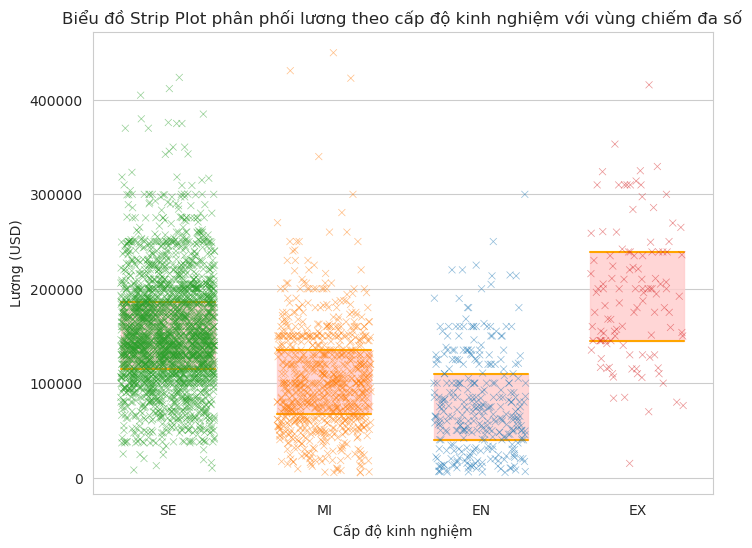

In [88]:
# Đảm bảo dữ liệu đã được tải vào DataFrame 'data'
# data = pd.read_csv('path_to_your_data.csv') # Dòng này là để tải dữ liệu nếu cần
data = pd.read_csv('ds_salaries.csv') 
plt.figure(figsize=(8, 6))

# Tạo bảng màu tùy chỉnh cho từng cấp độ kinh nghiệm, điều chỉnh theo màu mong muốn
palette = {
    'EN': '#1f77b4',   # Blue shade for Beginner level
    'MI': '#ff7f0e',   # Orange shade for Mid level
    'SE': '#2ca02c',   # Green shade for Senior level
    'EX': '#d62728'    # Red shade for Expert level
}

# Vẽ Strip Plot với màu sắc theo từng cấp độ kinh nghiệm, gán experience_level làm hue
sns.stripplot(
    data=data, 
    x='experience_level', 
    y='salary_in_usd', 
    jitter=0.3,       # Tăng độ phân tán theo chiều ngang
    alpha=0.5,        # Đặt alpha cao hơn để các điểm mờ hơn
    size=5,           # Điều chỉnh kích thước điểm cho phù hợp
    edgecolor="auto", 
    linewidth=0.5, 
    palette=palette, 
    hue="experience_level", 
    marker='x',       # Thay đổi ký hiệu của mỗi điểm thành 'x'
    dodge=False, 
    legend=False
)

# Tính khoảng tứ phân vị (IQR) cho mỗi cấp độ kinh nghiệm
for level in data['experience_level'].unique():
    level_data = data[data['experience_level'] == level]['salary_in_usd']
    q1 = level_data.quantile(0.25)  # Phân vị 25%
    q3 = level_data.quantile(0.75)  # Phân vị 75%
    idx = data['experience_level'].unique().tolist().index(level)
    
    # Tô màu vùng chiếm đa số với màu vàng nhạt
    plt.fill_betweenx(y=[q1, q3], x1=idx - 0.3, x2=idx + 0.3, color='#ffcccc', alpha=0.8)
    
    # Vẽ khung viền trên và dưới cho vùng chiếm đa số
    plt.plot([idx - 0.3, idx + 0.3], [q1, q1], color='orange', linestyle='-', linewidth=1.5)  # Đường viền trên
    plt.plot([idx - 0.3, idx + 0.3], [q3, q3], color='orange', linestyle='-', linewidth=1.5)  # Đường viền dưới

# Gắn tiêu đề và nhãn trục
plt.title("Biểu đồ Strip Plot phân phối lương theo cấp độ kinh nghiệm với vùng chiếm đa số")
plt.xlabel("Cấp độ kinh nghiệm")
plt.ylabel("Lương (USD)")

# Hiển thị biểu đồ
plt.show()

#### Phân tích chi tiết Biểu đồ Strip Plot về Phân Phối Lương Theo Cấp Độ Kinh Nghiệm

##### 1. **Tổng quan**
   Biểu đồ Strip Plot giúp so sánh mức lương giữa các cấp độ kinh nghiệm khác nhau, từ **Beginner** (EN) đến **Expert** (EX). Với mỗi điểm dữ liệu là một mức lương, người xem có thể dễ dàng nhận diện không chỉ khoảng lương phổ biến mà còn các giá trị ngoại lệ trong mỗi cấp độ.

##### 2. **Phân tích vùng lương phổ biến (IQR)**
   Vùng màu trên biểu đồ cho thấy khoảng tứ phân vị (IQR), đại diện cho phần lớn mức lương ở mỗi cấp độ:
   - **Beginner (EN)**: Vùng này cho thấy các mức lương ở khoảng thấp nhất, phù hợp với vị trí khởi đầu.
   - **Mid-level (MI)** và **Senior (SE)**: Các nhóm này có vùng lương phổ biến cao hơn và trải rộng, phản ánh sự gia tăng thu nhập khi kinh nghiệm tăng lên.
   - **Expert (EX)**: Vùng này có mức lương phổ biến cao nhất, với phạm vi rộng hơn, cho thấy sự đa dạng về lương giữa các chuyên gia.

##### 3. **Các mức lương vượt trội và ngoại lệ**
   Các điểm ngoài vùng IQR (highlight) cho thấy các mức lương vượt trội hoặc thấp hơn hẳn, giúp nhận diện các trường hợp đặc biệt. Điều này có thể phản ánh các yếu tố như kỹ năng đặc thù, công việc ở các khu vực đắt đỏ, hoặc tính cạnh tranh cao.

#### 4. **Kết luận và Nhận xét**
   - **Xu hướng chung**: Mức lương có xu hướng tăng theo cấp độ kinh nghiệm, với sự khác biệt rõ ràng từ Beginner đến Expert.
   - **Độ biến động lương**: Cấp độ kinh nghiệm càng cao, độ biến động lương càng lớn, cho thấy sự linh hoạt và ảnh hưởng của các yếu tố bên ngoài như ngành nghề, địa điểm làm việc và kỹ năng chuyên môn.

Biểu đồ này giúp người xem có cái nhìn chi tiết và toàn diện về phân phối lương theo từng cấp độ kinh nghiệm, hỗ trợ trong việc đánh giá mức lương, xác định nhu cầu điều chỉnh chính sách lương, và hiểu rõ hơn về sự biến động trong thị trường lao động.


### ***3.3.Phân tích sử dụng mô hình Machine learning***

#### ***Mô hình RandomForestRegressor để dự đoán mức lương theo USD***

##### 1. **Lý do chọn mô hình RandomForestRegressor**
   - **Độ chính xác cao**: RandomForestRegressor kết hợp nhiều cây quyết định, giúp cải thiện độ chính xác và giảm thiểu hiện tượng quá khớp.
   - **Xử lý tốt dữ liệu phức tạp**: Mô hình này hoạt động tốt với dữ liệu không tuyến tính và dữ liệu danh mục, phù hợp khi dữ liệu chứa nhiều đặc điểm phân loại.
   - **Dễ hiểu và phổ biến**: Random Forest dễ triển khai và được sử dụng rộng rãi nhờ khả năng xử lý dữ liệu đa dạng và giải thích rõ ràng.

##### 2. **Ưu điểm của mô hình RandomForestRegressor**
   - **Khả năng khái quát tốt**: Random Forest hoạt động hiệu quả trên cả tập huấn luyện và kiểm tra nhờ việc kết hợp nhiều cây.
   - **Tự động nhận diện biến quan trọng**: Mô hình tự động tính toán tầm quan trọng của các biến, giúp xác định yếu tố ảnh hưởng lớn nhất đến dự đoán.
   - **Linh hoạt với các loại dữ liệu**: Random Forest có thể xử lý cả biến liên tục và biến phân loại mà không yêu cầu chuẩn hóa.

##### 3. **Các bước thực hiện mô hình RandomForestRegressor**
   - **Bước 1**: Chuẩn bị dữ liệu (`X` và `y`).
   - **Bước 2**: Mã hóa biến phân loại bằng One-hot Encoding.
   - **Bước 3**: Chia dữ liệu thành tập huấn luyện và kiểm tra.
   - **Bước 4**: Khởi tạo và huấn luyện RandomForestRegressor trên tập huấn luyện.
   - **Bước 5**: Dự đoán và đánh giá bằng MSE và R².

##### 4. **Đánh giá kết quả**
   - **Mean Squared Error (MSE)**: Đo lường sai số giữa giá trị dự đoán và giá trị thực tế. MSE càng nhỏ thì dự đoán càng chính xác.
   - **R-squared (R²)**: Phản ánh mức độ phù hợp của mô hình với dữ liệu. R² càng cao thì mô hình dự đoán càng tốt.

Mô hình RandomForestRegressor cho phép khai thác tối đa các đặc điểm của dữ liệu, giúp dự đoán mức lương với độ chính xác cao và nhận diện các yếu tố ảnh hưởng chính đến thu nhập.

#### ***Code cài đặt mô hình dự đoán***

In [89]:
# Load dataset
data = pd.read_csv('ds_salaries.csv')

# Define features and target
X = data.drop(columns=['salary_in_usd'])
y = data['salary_in_usd']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 68518706.47548856
R-squared (R²): 0.9826437806135544


#### ***Biểu đồ thể hiện sai số dự đoán***

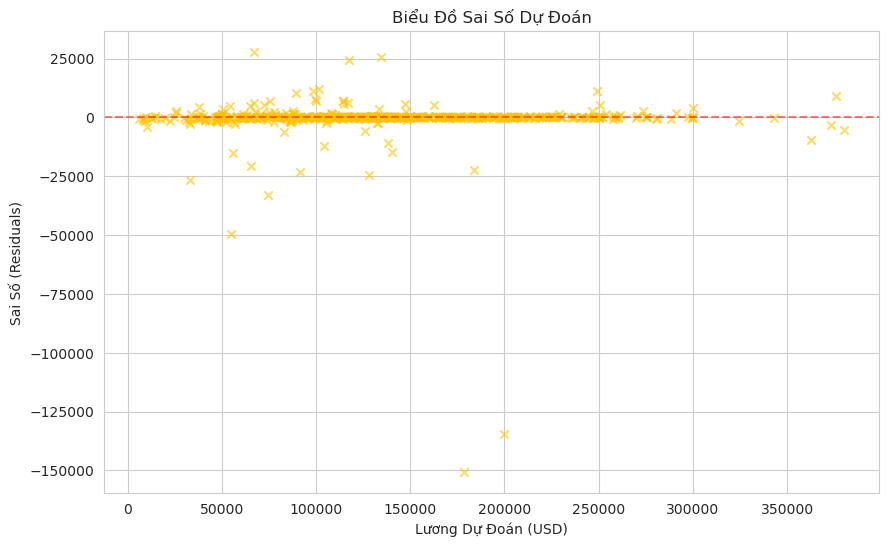

In [90]:
# Tính residuals (chênh lệch giữa giá trị thực tế và giá trị dự đoán)
residuals = y_test - y_pred

# Vẽ Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='#FFC300', marker='x')  # Màu vàng nhạt và ký hiệu 'x'
plt.axhline(0, color='red', linestyle='--', alpha=0.5)  # Đường tham chiếu y=0 với độ nhạt
plt.xlabel("Lương Dự Đoán (USD)")
plt.ylabel("Sai Số (Residuals)")
plt.title("Biểu Đồ Sai Số Dự Đoán")
plt.show()

#### Đánh giá kết quả mô hình RandomForestRegressor

##### Kết quả đánh giá mô hình:
- **Mean Squared Error (MSE)**: 68,518,706.48
- **R-squared (R²)**: 0.9826

##### Nhận định:
1. **Độ chính xác của mô hình**: Giá trị R² = 0.9826, gần đạt 1, cho thấy mô hình đã giải thích được 98.26% phương sai của dữ liệu, thể hiện khả năng dự đoán tốt và phù hợp với dữ liệu.

2. **Sai số trung bình bình phương (MSE)**: MSE có giá trị khá lớn, tuy nhiên do R² rất cao nên sai số này vẫn nằm trong mức chấp nhận được, đặc biệt khi xử lý dữ liệu có phạm vi rộng như mức lương.

##### Đánh giá dựa trên biểu đồ Residual Plot:
- Biểu đồ Residual Plot cho thấy phần lớn các sai số phân bố đồng đều xung quanh đường y=0, chứng tỏ rằng mô hình không có dấu hiệu sai lệch hệ thống (systematic bias).
- Hầu hết sai số tập trung gần giá trị 0, với một số điểm ngoài rìa cho thấy một số dự đoán lương cao có sai số lớn hơn. Điều này có thể do ảnh hưởng từ các yếu tố đặc biệt của dữ liệu ở mức lương cao.

##### Kết luận:
- Mô hình RandomForestRegressor đã dự đoán lương chính xác, với độ phù hợp cao (R²) và phân bố sai số hợp lý. Mô hình có thể áp dụng hiệu quả cho dữ liệu.